# Problem solving using a typical  machine learning workflow&mdash;scikit-learn Pipelines

**Created by Dr. James G. Shanahan**

For any project where machine learning is being used as the main tool to solve a problem, it is typical to use the following workflow, which is depicted below, and described in the following.

The main stages in machine learning workflow are as follows (they are depicted below also):
1. **Problem Definition**: Define the business problem you require an solution for;  work with experts, stakeholders to scope the problem, and metrics for success.
* **Data logging and loading (aka extract, transform, load (ETL))**: This step involves firstly identifying and gathering the data you want to work with. Sometimes the data for a problem can be raw and unstructured (in, say, transaction logs for an online retailer, where transaction could range from page views, page clicks, add to shopping cart, purchase, return item, rate item, etc.); it is rarely in the correct form to be processed by a machine learning algorithm (typically a machine learning algorithm requires data to be all numbers). It usually involves filling in missing values, or removing duplicate records, or normalising (e.g., standardising),  and correcting other flaws in data, like different representations of the same values in a column for instance. This is where the feature extraction, construction and selection takes place too.
* **Exploratory Data Analysis (EDA)**: exploratory data analysis (EDA) tries to understand the data through summarizing the main characteristics of data, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Though EDA was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments (e.g., five number summary of numerical data—the two extremes (maximum and minimum), the median, and the quartiles;  identify outliers, trends and patterns in data that merited further study). 
  * **Feature engineering**:  Feature engineering is about creating new input features from your existing ones. For example:
  * create interaction features, the product of feature such as $height X width$, 
  * create dummy variables from categorical variables; 
  * extract entities from text (e.g., extract person names, place names, book names from tweets) 

* **Model training and selection**: This phase involves multiple steps:
  * Split  the data into (generally three unless crossfold validation is used) subsets to train the model, validate, and objectively evaluate  against new data (blind test the best learnt model; this acts as a proxy for how the modeling pipeline might do in realworld, production setting).
  * Use the training subset of data as input to  machine learning algorithm pipeline so it can recognise the patterns in it and extract a model (e.g., for a simple linear regression model, learn the slope coefficient,  and the intercept).
  * Candidate Model Evaluation: Assess the performance of the model using  validation subsets of data to understand how accurate the prediction is. 
  * This subprocess is an iterative process and various algorithms might be tested until you have a Model that predicts sufficiently well (as determined by various performance metrics).
* **Lab experiments**: Machine learning can often be viewed as inner loop exercise where the selected model(s) is further evaluated on a domain task using domain specific metrics before being deployed to production. 
* **Model Deployment and monitoring**: Once the chosen model is produced, it is typically exposed via some kind of API and embedded in decision-making frameworks as a part of an production solution.
  * Performance Monitoring: The model is continuously monitored to observe how it behaves in the real world and calibrated accordingly. New data is collected to incrementally improve it (via online learning or batch retraining).

Each step of the pipeline (apart from the Problem Definition step) is fed data processed from its preceding step, a process sometimes known as chaining (and supported by the `pipeline` class in SKLearn's library. The abstract term **`pipeline`** is   implies a one-way flow of data from start to finish. It is import to note  that the steps in a  ML project (as opposed to pipelines) are cyclical and iterative as every step is repeated, possibly many times, to finally achieve, hopefully, a successful system.


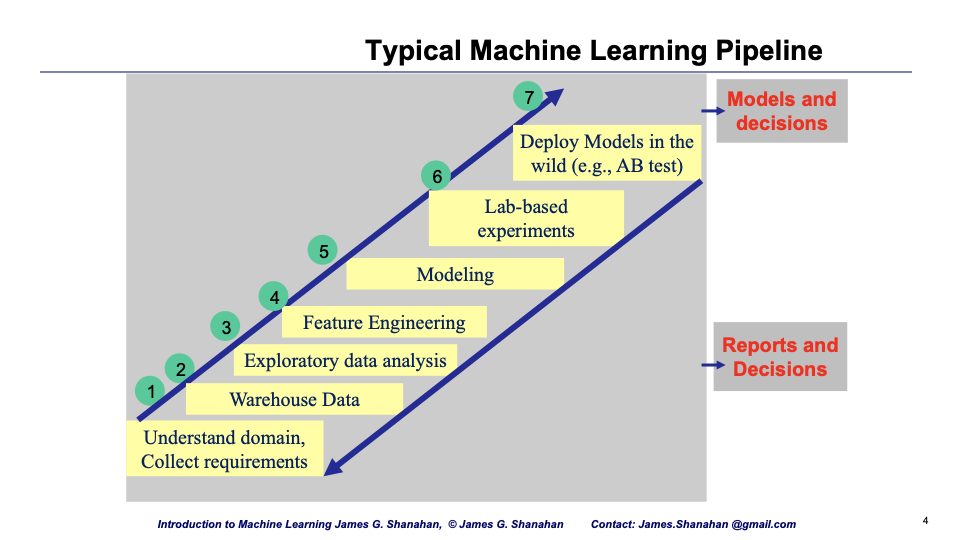

## Pipelines and composite estimators in python

To address the need of solving machine learning projects in Python, in 2007 David Cournapeau developed an initial version of **Scikit-learn** as a Google summer of code project. Later Matthieu Brucher joined the project and started to use it as apart of his thesis work. In 2010 INRIA got involved, and the first public release (v0.1 beta) of `sklearn` was published in late January 2010. The `sklearn`  project now has more than 30 active contributors and has had paid sponsorship from INRIA, Google, Tinyclues and the Python Software Foundation. The current stable is version of sklearn is `scikit-learn 0.22.2`. Over the years, the concept of workflow, and workflow management has made its way in to sklearn in the form of the [Pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline) class and its associated tightly integrated ecosystem with sklearn.

The motivation for the pipeline framework in scikit-learn is spurred by the fact that most machine learning algorithms require datasets that meet some or all of the following requirements:

* all feature values are numerical
  * categorical data are one hot encoded
  * ordinal categories are transformed to a numerical ordinal scale
  * text data is transformed to a numercial representation such as TF_IDF, or as a hashed representation
* missing data have been filled in with intelligent estimates 
* data is normalized (e.g., standardized)
* domain knowledge, often in the form of derived features have been computed and added as new features 
  * these derived features should be precomputed or the means to construct them should be made available to the modeling step
* more generally, feature engineering may lead to raw features been used to derive new features, e.g., a derived features `area` can be computed based on the following from $area = height\cdot width$ 


Abstractly, scikit-learn [Pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline), are a [directed acylic graph (DAG)](https://en.wikipedia.org/wiki/Directed_acyclic_graph) wrapper class,  that enables the implementation of machine learning workflows as a composition of data pre-processing steps, often referred to as (data) transformers, followed by   a modeling step. Each of these steps are  children of the `Estimator` class as each potential has parameters or coefficients that need to be estimated before the step can be used (to either transform the input data, or predict, say, a target value of the a test case in the case of transformers or modelers respectively).    With a `pipeline` object, data transformer steps are usually combined with classifiers, regressors or other estimators to build a composite estimator.  A prediction pipeline is composed of a sequence of  transformers (builtin or custom-built), followed by a final estimator arranged as a directed graph.


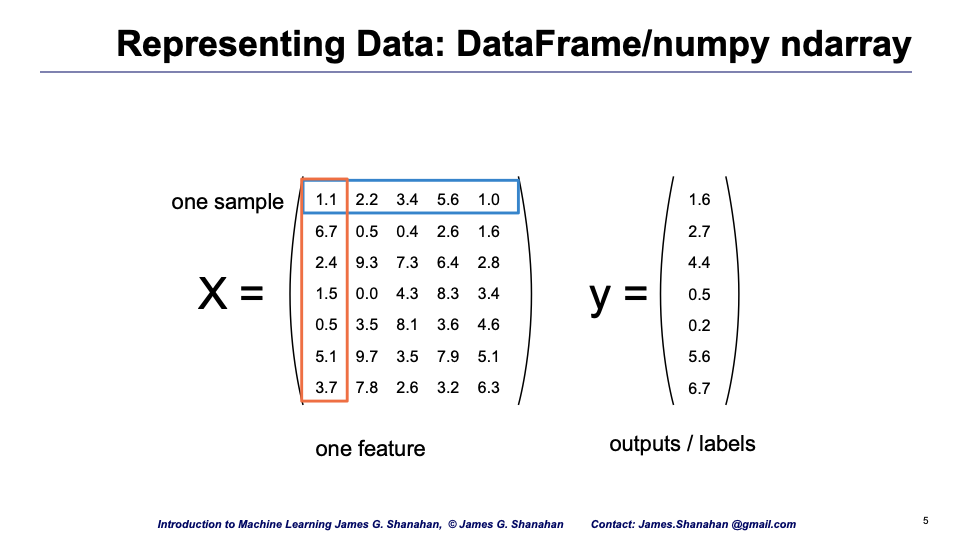

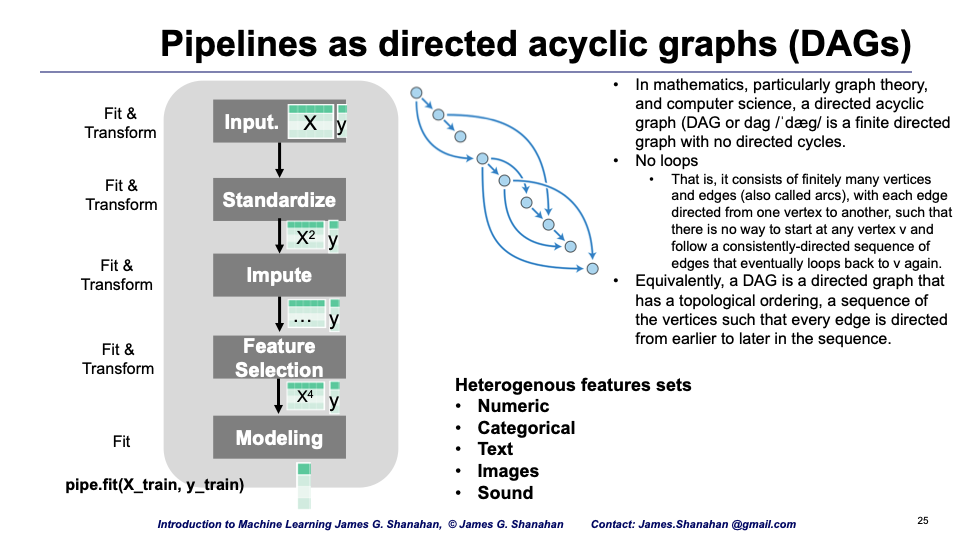

###### 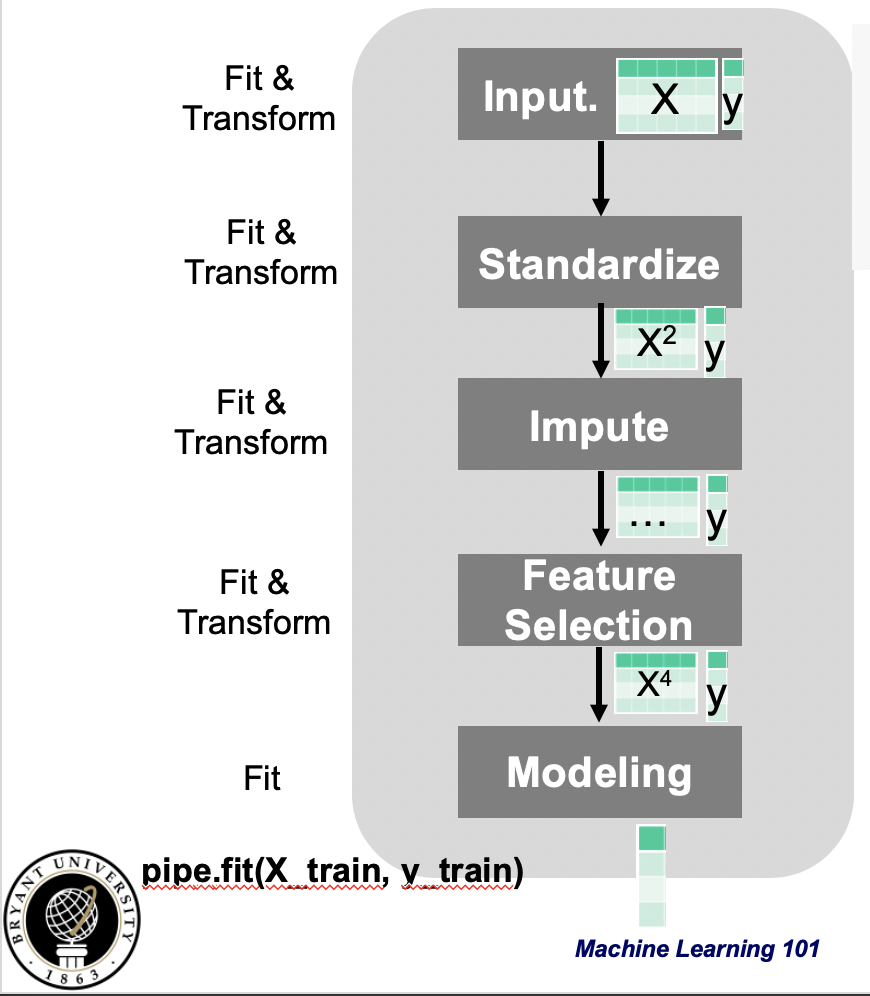

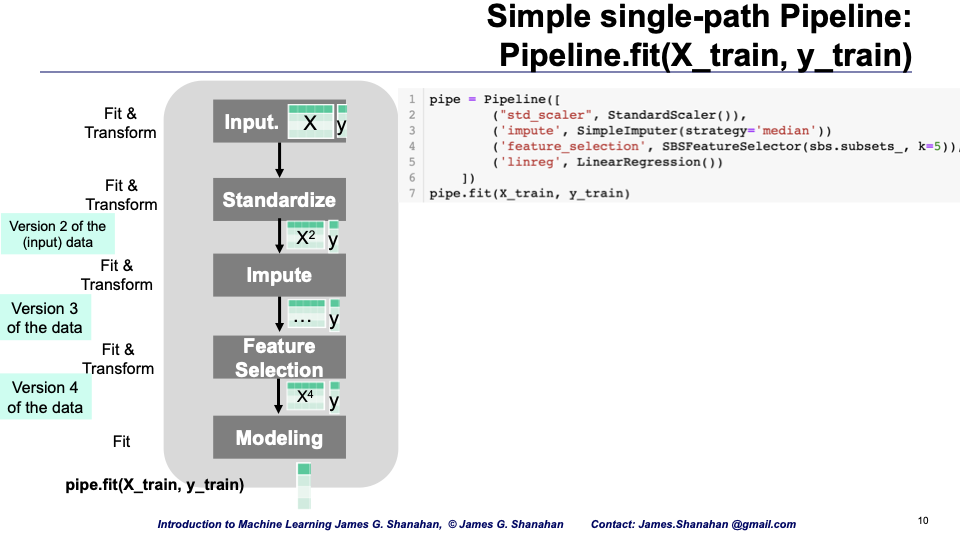

**Figure: A machine learning workflow represented as  a composition of data transformer steps,  combined with linear regression step. Here the portrayed prediction pipeline is composed of a sequence of built-in transformers (though  or custom-built transformer can also be engineering and integrated into the workflow easily), followed by a final estimator, all of which is represented as a directed graph.**


During the learning phase of typical machine learning workflow, the pipeline framework sequentially applies a list of transforms to the raw input data, utimately, yielding a fully prepped dataset that then be used by the final step in the pipeline, a modeling step which trains a model. The following figure depicts the pipeline workflow for training (`fit`) a model from raw data for a sample linear regression workflow, along with SKlearn's implementation of the `fit()` method for the `Pipeline` class**.

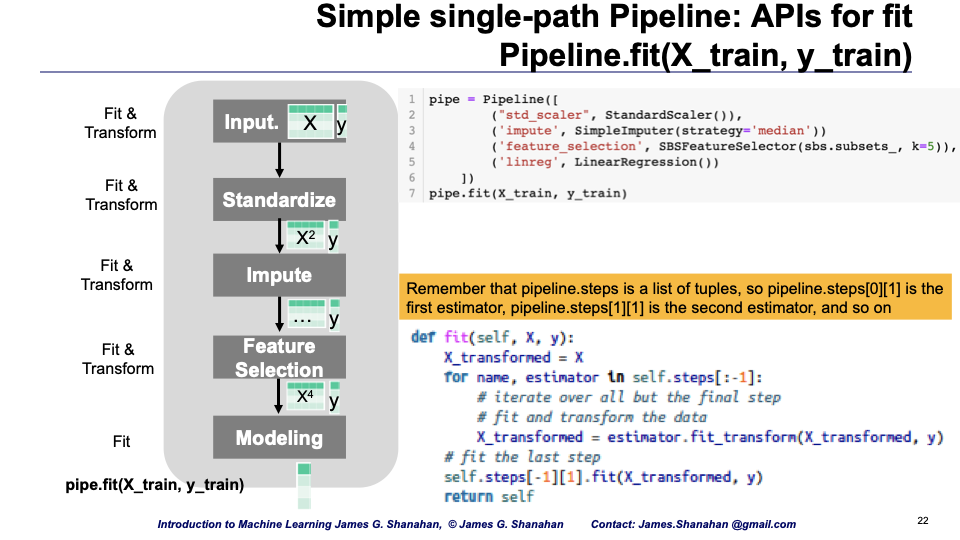

Intermediate steps of the pipeline, such as Standardize, impute, feature selection, must be ‘transformers’, that is, they must implement `fit` and `transform` methods. The final estimator step only needs to implement `fit`. Note, the transformers in the pipeline can be cached using the `memory` argument.

The following depicts the corresponding workflow predicting (`predict`) a target value from raw data for a sample linear regression workflow, along with SKlearn's implementation of the `predict()` method for the `Pipeline` class**

**Figure: The pipeline workflow for training (`fit`) a model from raw data for a sample linear regression workflow, along with SKlearn's implementation of the `fit()` method for the `Pipeline` class**

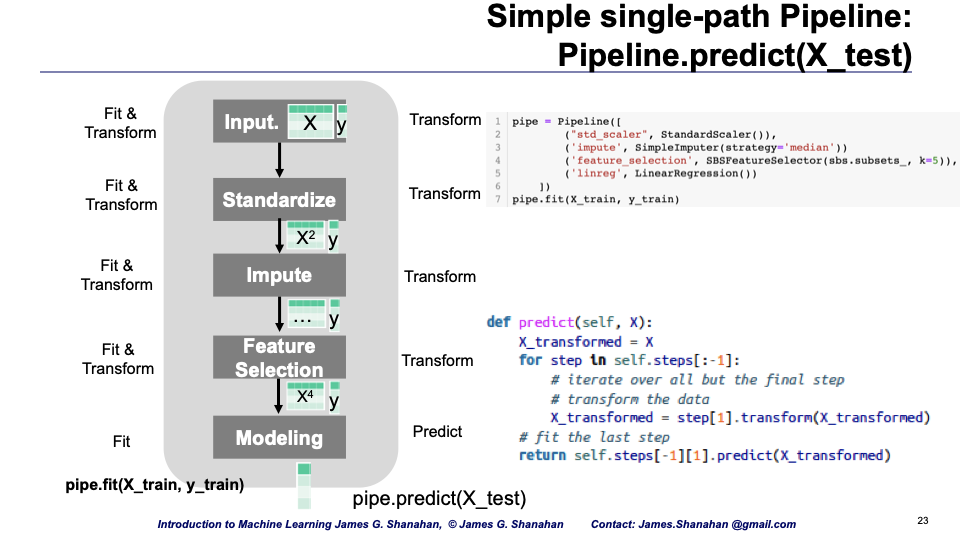

**Figure: The pipeline workflow for predicting (`predict`) a target value from raw data for a sample linear regression workflow, along with SKlearn's implementation of the `predict()` method for the `Pipeline` class**


Besides chain multiple estimators into one (e.g., processing the data, for example feature selection, normalization and classification), [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) offer several additional advantages:

* **Convenience and encapsulation**
  * You only have to call fit and predict once on your data to fit a whole sequence of estimators.

* **Joint parameter selection/tuning**
   * You can grid search over parameters of all estimators in the pipeline at once. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a ‘__’. A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting it to `passthrough` or None.
* **Safety**
  * Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

## Deploying a pipeline in production
When it comes to deploying a, say logistic regression, model the learnt model is simply the learnt input variable coefficients and the learnt bias term. So deploying the model is relatively straigtforward involving a single vector of estimated values. When it comes to deploying a pipeline, it will not just be a matter of deploying the model's vector or estimated values. The whole pipeline of steps will need to be  put into production; the pipeline, composed of the transformer steps (though these may be greatly simplified in deployment mode as they will not be needed to be fitted/estimated), and the prediction step  will all need to be deployed on production servers.

## Building pipelines using sklearn
Using sklearn,the Pipeline object is created using a list of estimator steps of the form `(key, value)` pairs, where the key is a string containing the `name` you want to give a step, and the value is a corresponding `estimator` object for that step:

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
estimators = [('reduce_dim', PCA()),   ('clf', SVC())]
pipe = Pipeline(estimators)
pipe 



Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

### utility function make_pipeline
The utility function `make_pipeline` is a shorthand for constructing pipelines; it takes a variable number of estimators and returns a pipeline, filling in the names automatically:

```python
>>> from sklearn.pipeline import make_pipeline
>>> from sklearn.naive_bayes import MultinomialNB
>>> from sklearn.preprocessing import Binarizer
>>> make_pipeline(Binarizer(), MultinomialNB()) 
Pipeline(memory=None,
         steps=[('binarizer', Binarizer(copy=True, threshold=0.0)),
                ('multinomialnb', MultinomialNB(alpha=1.0,
                                                class_prior=None,
                                                fit_prior=True))])
```

Notice, when using the `make_pipeline` function, that each step in the pipeline is assigned a name automatically, by lower-casing the name of the class that forms that step. E.g., the  `MultinomialNB` step is named `'multinomialnb'`

In [293]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
a_simple_pipe = make_pipeline(Binarizer(), MultinomialNB()) 
print(a_simple_pipe)

Pipeline(memory=None,
         steps=[('binarizer', Binarizer(copy=True, threshold=0.0)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)


### pipe.steps[0]
The estimators of a pipeline are stored as a list in the `steps` attribute:
    
```python
>>> pipe.steps[0]
('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))
```

In [300]:
print(a_simple_pipe.steps)
print("-"*50+"\n")
print(a_simple_pipe.steps[0])


[('binarizer', Binarizer(copy=True, threshold=0.0)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]
--------------------------------------------------

('binarizer', Binarizer(copy=True, threshold=0.0))


### access the steps in a pipe via the dictionary api via a pipe.named_steps['step_name']
The estimators of a pipeline are stored as a list in the `steps` attribute and can be accessed via the  dictionary attribute  `named_steps` in the `Pipeline` class:

```python
>>> pipe.named_steps['reduce_dim']
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
```

In [299]:
print(a_simple_pipe.named_steps)
print("-"*50+"\n")
print(a_simple_pipe.named_steps["multinomialnb"])

{'binarizer': Binarizer(copy=True, threshold=0.0), 'multinomialnb': MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)}
--------------------------------------------------

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


### Access parameters of each step via `<estimator>__<parameter>`
Parameters of the estimators in the pipeline can be accessed using the `<estimator>__<parameter>` syntax:

```python
>>> pipe.set_params(clf__C=10) 
Pipeline(memory=None,
         steps=[('reduce_dim', PCA(copy=True, iterated_power='auto',...)),
                ('clf', SVC(C=10, cache_size=200, class_weight=None,...))])
```

Here accessing the C parameter of the classifier step `clf` is accomplished by  `clf__C` (this conforms to the pattern `<estimator>__<parameter>`).

Attributes of named_steps map to keys, enabling tab completion in interactive environments:

```python
>>> pipe.named_steps.reduce_dim is pipe.named_steps['reduce_dim']
True
```

This is particularly important for doing grid searches:

```python
>>> from sklearn.model_selection import GridSearchCV
>>> param_grid = dict(reduce_dim__n_components=[2, 5, 10],
...                   clf__C=[0.1, 10, 100])
>>> grid_search = GridSearchCV(pipe, param_grid=param_grid)
```
Again, access to parameters of the individual steps is accomplished via the `<estimator>__<parameter>` pattern. E.g.,:

* `clf__C` for the `clf` step
* `reduce_dim__n_components` for the `reduce_dim` step

The following is an example of a pipeline in action for the iris dataset:

In [353]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.utils import check_random_state
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd


# load the data
iris = load_iris()
X = pd.DataFrame.from_records(data=iris.data, columns=iris.feature_names)
y = iris.target
display(X.head(5))
# get a random state for repeatability
seed = 42
random_state = check_random_state(seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y, test_size=0.2)
display(X_train.head())

#-------------------------------------------
# Pipeline
#-------------------------------------------
estimators = [('reduce_dim', PCA()),    ('clf', SVC(gamma='auto'))]
pipe = Pipeline(estimators)
print(pipe)

param_grid = dict(reduce_dim__n_components=[2, 3],
                  clf__C=[0.1, 10, 100])
cv_folds=3
print("-"*60)
print(f"Number of different experiments is : {np.product([len(param_grid[k]) for k in param_grid])}")
print(f"Number of pipelines to estimate is : {1+ cv_folds*np.product([len(param_grid[k]) for k in param_grid])}")
print("-"*60)
       
print("\n\nPerforming grid search...")
print("Pipeline Steps:", [name for name, _ in pipe.steps])
print("\npipeline hyperparameters:")
pprint(param_grid)

best_pipe = GridSearchCV(pipe, param_grid=param_grid, cv=cv_folds, iid=False, verbose =1)


#-------------------------------------------
# Run Gridsearch and report 
#-------------------------------------------
t0 = time()
best_pipe.fit(X_train, y_train)
print("\n\n\n"+"-"*60)
print("It took  %0.3f seconds to run this grid search" % (time() - t0))
print()
print("cross validaion score for best hyperparameter combo is : %0.3f" % best_pipe.best_score_)
print("Best parameters set:")
best_parameters = best_pipe.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
y_pred_test = best_pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy of logistic regression model is {np.round(acc, 3)}")
print("-"*60)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3


Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
------------------------------------------------------------
Number of different experiments is : 6
Number of pipelines to estimate is : 19
------------------------------------------------------------


Performing grid search...
Pipeline Steps: ['reduce_dim', 'clf']

pipeline hyperparameters:
{'clf__C': [0.1, 10, 100], 'reduce_dim__n_components': [2, 3]}
Fitting 3 folds for each of 6 candidates

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished


### Individual steps can be skipped or replaced as parameters
Individual steps may also be replaced as parameters, and non-final steps may be ignored by setting them to `None`:

```python
>>> from sklearn.linear_model import LogisticRegression
>>> param_grid = dict(reduce_dim=[None, PCA(5), PCA(10)],
...                   clf=[SVC(), LogisticRegression()],
...                   clf__C=[0.1, 10, 100])
>>> grid_search = GridSearchCV(pipe, param_grid=param_grid)
```

Here reduce_dim can be
* None 
* PCA(5)
* PCA(10) 

In addition, individual steps may also be replaced as parameters. E.g.,

clf can be
* SVC()
* or LogisticRegression()

The following code show these possibilities in action when pipelines of different configurations (`[None, PCA(2), PCA(3)]` x  `[SVC(), LogisticRegression()]`  are considered leading six (6) possible pipelines. E.g., `None` x `SVC()` (i.e., a single step pipeline with a support vector machine step, and with no PCA step). 

In [352]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.utils import check_random_state
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd


# load the data
iris = load_iris()
X = pd.DataFrame.from_records(data=iris.data, columns=iris.feature_names)
y = iris.target
display(X.head(5))
# get a random state for repeatability
seed = 42
random_state = check_random_state(seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y, test_size=0.2)
display(X_train.head())


estimators = [('reduce_dim', PCA()),    ('clf', SVC(gamma='auto'))]
pipe = Pipeline(estimators)
print(pipe)


#-------------------------------------------
# Pipeline
#-------------------------------------------
estimators = [('reduce_dim', PCA()),    ('clf', SVC(gamma='auto'))]
pipe = Pipeline(estimators)
print(pipe)
param_grid = dict(reduce_dim = [None, PCA(2), PCA(3)],    
                  clf        = [SVC(gamma='auto'), 
                                LogisticRegression(solver='lbfgs',max_iter=1000, multi_class='multinomial')],
                  clf__C     = [0.1, 10, 100])  #complexity term

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipe.steps])
print("pipeline hyperparameters:")
pprint(param_grid)

cv_folds=3
print("-"*60)
print(f"Number of different experiments is : {np.product([len(param_grid[k]) for k in param_grid])}")
print(f"Number of pipelines to estimate is : {1+ cv_folds*np.product([len(param_grid[k]) for k in param_grid])}")
print("-"*60)

best_pipe = GridSearchCV(pipe, param_grid=param_grid, cv=cv_folds, iid=False, verbose = 1)  #verbose = 2 get a lot of output 


#-------------------------------------------
# Run Gridsearch and report 
#-------------------------------------------
t0 = time()
best_pipe.fit(X_train, y_train)
print("\n\n\n"+ "-"*60)
print("It took  %0.3f seconds to run this grid search" % (time() - t0))
print()
print("cross validaion score for best hyperparameter combo is : %0.3f" % best_pipe.best_score_)
print("Best parameters set:")
best_parameters = best_pipe.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
y_pred_test = best_pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy of logistic regression model is {np.round(acc, 3)}")
print("-"*60)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3


Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.





------------------------------------------------------------
It took  0.681 seconds to run this grid search

cross validaion score for best hyperparameter combo is : 0.967
Best parameters set:
	clf: SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
	clf__C: 0.1
	reduce_dim: PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
Test accuracy of logistic regression model is 0.9
------------------------------------------------------------


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.7s finished


Transformers are usually combined with classifiers, regressors or other estimators to build a composite estimator.  Pipeline is often used in combination with FeatureUnion which concatenates the output of transformers into a composite feature space. TransformedTargetRegressor deals with transforming the target (i.e. log-transform y). In contrast, Pipelines only transform the observed data (X).

## Caching transformers: avoid repeated computation
Fitting transformers may be computationally expensive. With its `memory parameter` set, Pipeline will cache each transformer after calling fit. This feature is used to avoid computing the fit transformers within a pipeline if the parameters and input data are identical. 

**A typical example is the case of a grid search in which the transformers can be fitted only once and reused for each configuration.**

The parameter memory is needed in order to cache the transformers. memory can be either a string containing the directory where to cache the transformers or a `joblib.Memory object`:

```python
>>> from tempfile import mkdtemp
>>> from shutil import rmtree
>>> from sklearn.decomposition import PCA
>>> from sklearn.svm import SVC
>>> from sklearn.pipeline import Pipeline
>>> estimators = [('reduce_dim', PCA()), ('clf', SVC())]
>>> cachedir = mkdtemp()
>>> pipe = Pipeline(estimators, memory=cachedir)
>>> pipe 
Pipeline(...,
         steps=[('reduce_dim', PCA(copy=True,...)),
                ('clf', SVC(C=1.0,...))])
>>> # Clear the cache directory when you don't need it anymore
>>> rmtree(cachedir)
```

**Warning: use with care! This is a relatively new feature in sklearn.**

## Scikit-Learn design principles and how it relates to  pipelines
Started in 2007, scikit-learn is developed by an international team of over
a dozen core developers, mostly researchers from various fields (e.g., computer
science, neuroscience, astrophysics). Scikit-Learn’s API is remarkably well designed. These are the main design principles, laid out in detail in the 2013 seminal paper [API design for machine learning software: experiences from the scikit-learn project](https://arxiv.org/abs/1309.0238) are summarized here:
* **Consistency**: All objects share a consistent and simple interface:
  * **Estimators**: Any object that can estimate some parameters based on a dataset is called an estimator (e.g., an imputer is an estimator). The estimation itself is performed by the fit() method, and it takes only a dataset as a parameter (or two for supervised learning algorithms; the second dataset contains the labels). Any other parameter needed to guide the estimation process is considered a hyperparameter (such as an imputer’s strategy), and it must be set as an instance variable (generally via a constructor parameter).
  * **Transformers**:  Some estimators (such as an imputer) can also transform a dataset; these are called transformers. Once again, the API is simple: the transformation is performed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for an imputer. All transformers also have a convenience method called fit_transform() that is equivalent to calling fit() and then transform() (but sometimes fit_transform() is optimized and runs much faster).
  * **Predictors**: Finally, some estimators, given a dataset, are capable of making predictions; they are called predictors. For example, the LinearRegression model in the previous chapter was a predictor: given a country’s GDP per capita, it predicted life satisfaction. A predictor has a predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a score() method that measures the quality of the predictions, given a test set (and the corresponding labels, in the case of supervised learning algorithms). 
* **Inspection**: All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., imputer.strategy), and all the estimator’s learned parameters are accessible via public instance variables with an underscore suffix (e.g., imputer.statistics_).
* **Nonproliferation of classes**: Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.
* **Composition**: Existing building blocks are reused as much as possible. For example, it is easy to create a Pipeline estimator from an arbitrary sequence of transformers followed by a final estimator, as we will see.
* **Sensible defaults**:  Scikit-Learn provides reasonable default values for most parameters, making it easy to quickly create a baseline working system.

## References

* SKLearn documentation and examples [compose.html#pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline)

* http://zacstewart.com/2014/08/05/pipelines-of-featureunions-of-pipelines.html
* http://michelleful.github.io/code-blog/2015/06/20/pipelines/

# scikit-learn Pipelines &mdash; a composition of  transformer steps, followed by a predictor step 

scikit-learn's `Pipeline` class provides a natural way to declare a modeling workflow of  data transformation  and modeling steps. It is a wrapper class that enables the expression of  this pipleline as a graph of transformation steps, followed by a modeling step. It takes as input the raw data and passes it through the pre-processing transformation stages (lets assume a single path pipeline for now) and onto the modeling stage without retaining multiple copies of the data.

Moreover, if the transformer steps are performing any type data dependent operations (known as stateful operations), such as  feature selection or data standardization (means and standard deviations depend on the data),   it is important to include that pre-processing steps within the scope of cross-validation, an integral part of hyperparameter tuning.  Pipelines greatly simplify this process of hyperparameter tuning. 


### scikit-learn's  Pipeline class
For more information on the scikit-learn's  Pipeline class click [here](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Here is a blurb from the  [scikit-learn's  Pipeline manual page](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

```python
Pipeline of transforms with a final estimator.

Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a ‘__’, as in the example below. A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting it to ‘passthrough’ or None.
```

## Transformers

A transformer or a composition of transformers, allow us to alter the input data in a way that prepares it for use in a machine learning algorithm. Scikit-learn includes many built-in transformers, but also provides a handy interface called the `TransformerMixin` which  allows the design of custom transformers as needed. Examples of common builtin transformers include:

- The `SimpleImputer` class, which  fills in missing values in the data subject to a user-defined strategy. This is typically a first-step in the pipeline. A common `Imputer` is to fill in the missing values in a feature with the feature's mean value, like so:

    <img src="img/impute.png" alt="Mean imputation" style="width: 700px;"/>

    However, there are several potential weaknesses to using this strategy. For instance, what if&mdash;much as we see for `petal length (cm)`&mdash;the distribution of the feature is skewed or non-normal? Mean might not be a good measure of central tendency. Moreover, what if the feature is categorical? Using mean would not make sense. Alternatives include "median," or even using a classifier on the present features to impute missing values.


- The `Scaler`, which will bring all of the data into the same scale (which is important for most gradient descent-based machine learning techniques). This can be important in situations where different units across features may impact covariance matrices or distance matrices (clustering, SVM, PCA, etc.). One approach to scaling the data is to standarize the data, i.e.,  o center each feature with mean 0 and standard deviation 1:

    <img src="img/scale.png" alt="scaling" style="width: 800px;"/>


- `Feature selection` or `data transformations` like [`PCA`](https://en.wikipedia.org/wiki/Principal_component_analysis), [`Factor Analysis`](https://en.wikipedia.org/wiki/Factor_analysis), etc. These techniques either drop features subject to some test (F-test, for instance) or reduce the feature space via matrix factorization techniques.

    <img src="img/pca.png" alt="PCA" style="width: 700px;"/>


- `Feature engineering/extraction`: Sometimes domain expertise can be incorporated in the  machine learning pipeline by way of feature engineering. For example, 
* derive new features, e.g., the area of a flower, defined as  $length\cdot width$ may be a heuristic that botanists use to classify iris flowers.
* Aggregations: aggregation features can prove to be very discriminating and ultimately predictive. These can generated using, say,  SQL `group by`-like statements such  e.g., group sales by state  based on functions such as  min, max, mean. 
* Therefore, in the case of the `area` feature,  we could design a custom transformer using the `TransformerMixin` super class that would compute area from the `width` and `length` features, which would be a feature we then feed into the modeling step. Feature engineering transformers generally resemble the following:


<img src='attachment:image.png' width=600 align='center'>

## transformers versus predictors: a case of  `init`, `fit`,  and `transform`/`predict`

Within scikit-learn Pipelines framework, abstractly, there are three stages in the object lifecycle of every  estimator, be they a transformer-type estimator or a modeler-estimator:


1. init: initialize the estimator
* `fit`:  estimate the parameters/coefficients from the data that are subsequently used to transform the data or predict an outcome
* `transform`/`predict`: the third method for a transformer estimator object is the transform method which transforms the input data, whereas the third method for a modeler object is the `predict` method which uses the learnt model predict  target values for the transformed input data.


Both transformers and modeler estimators  follow the typical object-oriented lifecycle, where the first step is to create an instance, whereby  the init method is called.  All transformers and modelers in scikit-learn adhere to the following interface:

```python
# initialize (but do not fit) the estimator
estimator = SomeEstimator(*args, **kwargs)  #e.g., LinearRegression()
```


Once an estimator is initialized, and before a transformer or model can transform or predict, it needs to have been fitted. In order to understand how the different stages work, think of a model as a nascent brain&mdash;it knows nothing! The `fit` procedure is the process by which the "brain" is presented with examples (training data) and labels in order for it to learn. The more data it's presented, generally, the more it's able to abstract patterns from the data into better hypotheses about the target. The `fit` process is *only* performed on the training data.

For any given modeler/estimator in scikit-learn, the signature for fitting a model is the following:

```python
estimator.fit(X_train, y_train)  # returns self
```

After fitting a model, you can generate predictions (for __estimators__) or transform new data (for __transformers__):

```python
# for a model:
predictions = estimator.predict(X_test)

# for a transformer:
transformed_data = transformer.transform(X_test)
```

### Example custom transformer for centering the data

Although Scikit-Learn provides many useful transformers, you will need to write
your own custom transformers for tasks such as:

* data preprocessing, 
* feature transformations, 
* or for feature engineering. 

You will want your custom transformer to work seamlessly with Scikit-Learn's
`pipelines` framework and since Scikit-Learn relies on [duck typing](https://en.wikipedia.org/wiki/Duck_typing)
(not inheritance), all you need to do is create a class and implement three
methods: `fit()` (returning self), `transform()`, and `fit_transform()`. You can get the last one for free by simply adding `TransformerMixin` as a base
class. The `get_feature_names()` provides a way to access the column names of the output transformed data.

If you add `BaseEstimator` as a base class (and avoid `*args` and `**kargs` in your constructor), you will also get two extra methods (`get_params()` and
`set_params()`) that will be useful for automatic hyperparameter tuning.


The pipeline framework is very flexible with regard to developing your own custom transformer classes (and custom modeling classes if you care to implement your own modeling algorithms from scratch). As mentioned previosly these custom classes need to: 

* implement three methods: `fit()` (returning self), `transform()`, and `fit_transform()`
* and otherwise, they are super flexible. For example, the input data can be a vector, a series, a dataframe, or a numpy ndarray:
  * X:  Training data. Must fulfill input requirements of first step of the pipeline.

  * y: default=None: Training targets. Must fulfill label requirements for all steps of the pipeline.

The following is a template data transformer class, where it transforms the input data by centering it about the mean of each input feature. The input is a `dataframe` and the output transformed data is also a `dataframe`.

When it comes to built-in Scikit-Learn transformers, such as `SimpleImputer`, the input data can be a `dataframe` or ndarray but the output transformed data is always as a `numpy ndarray`. This is likely to change with future versions of SKlearn.


### Code for custom transformer for centering the data


In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

#transformer
class MeanCenter(BaseEstimator, TransformerMixin):
    """center the data by subtracting the mean from each value"""
    def __init__(self, col):
        self.col = col
        
    def fit(self, X, y=None):
        self.mean_ = X[self.col].mean()
        return self
    
    def transform(self, X):
        # ensure the transformer has been fit
        check_is_fitted(self, 'mean_')
        
        # always copy the input frame - we don't want to
        # impact the original frame in place
        X = X.copy()
        col = self.col
        X[col] = X[col] - self.mean_
        return X

#### Test the transformer 
Test the `mean` transformer by creating an instance and doing the fit step, followed by the transform step.

```python
mc = MeanCenter(col='sepal width (cm)').fit(X_train)
display(mc.transform(X_train).head())
```


In [7]:
from sklearn.datasets import load_iris
import pandas as pd

# load the data
iris = load_iris()
X_train = pd.DataFrame.from_records(data=iris.data, columns=iris.feature_names)
display(X_train.head(5))

mc = MeanCenter(col='sepal width (cm)').fit(X_train)
display(mc.transform(X_train).head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,0.442667,1.4,0.2
1,4.9,-0.057333,1.4,0.2
2,4.7,0.142667,1.3,0.2
3,4.6,0.042667,1.5,0.2
4,5.0,0.542667,1.4,0.2


## Simple  pipeline with one path from stage 1 to the last stage

The input to a machine learning pipeline is generally raw data, and the output is predictions in the case of a supervised machine learning. The interim stages of the pipeline are called __transformers__, and the final stage is our __estimator__ (ML algorithm).

Here is a (very simple) example of what a pipeline might look like:

<img src="img/pipeline.png" alt="Pipeline example" style="width: 750px;"/>

## Making the iris dataset a little more realistic, and using a transformer to impute missing values

Since iris is such a well-put-together dataset, there are not many stages in the pipeline we need to address. However, there is one we absolutely need to handle because of the missing values&mdash;imputation. The last stage of the pipeline will be the __estimator__.


### Adding a twist to the iris dataset &mdash;missing values

For those who are familiar with iris, you'll know there are no missing values. However, since the purpose of this notebook is to address practical ML, dealing with missing values is going to be a common occurrence. We introduce a small amount of missing values in order to discuss strategies for imputing them later.

In [16]:
from sklearn.utils import check_random_state
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# load the data
iris = load_iris()
X_train = pd.DataFrame.from_records(data=iris.data, columns=iris.feature_names)
y_train = iris.target
display(X_train.head(5))

# get a random state for repeatability
seed = 42
random_state = check_random_state(seed)

# create a mask
missing_pct = 0.05
missing_mask = random_state.rand(*X.shape) < missing_pct

# assign the mask as missing values
X = X.where(~missing_mask, other=np.nan)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,NaN,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Simple pipeline with one stage, a built-in transformer

The `Pipeline` constructor takes a list of name/estimator pairs defining a
sequence of steps. All but the last estimator must be transformers (i.e., they
must have a fit_transform() method). The names can be anything you like (as
long as they are unique and don’t contain double underscores, `__`); they will
come in handy later for hyperparameter tuning.

When you call the pipeline’s `fit()` method, it calls `fit_transform()`
sequentially on all transformers, passing the output of each call as the
parameter to the next call until it reaches the final estimator, for which it calls
the `fit()` method.
The pipeline exposes the same methods
as
the final estimator. 

In the example provided next,
the last estimator is a `SimpleImputer`, which is a `transformer`, so the pipeline
has a `transform()` method that applies all the transforms to the data in
sequence (and of course also a `fit_transform()` method, which is the one we
used).


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# the pipeline takes 1 argument: a single list of length-2 tuples, 
# in the form of: (name, Estimator)
stages = [
    ('impute', SimpleImputer(strategy="median"))
]

pipe = Pipeline(stages)

### Fit & transform input data

In [20]:
# If a pipeline ends with an Estimator, it can transform (through all stages 
# except the estimator) OR predict (all the way through). If the pipeline only
# contains transformers, it cannot predict--it can only transform
pipe.fit(X_train, y_train)

# let's take a look at the transformed data
print(f"type of the input dataset X is {type(X_train)}")
print(f"type of the transformer output is {type(pipe.transform(X_train)[:5])}")
pipe.transform(X_train)[:5]

type of the in data X is <class 'pandas.core.frame.DataFrame'>
type of the transformer output is <class 'numpy.ndarray'>


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Notice that the pipeline takes a matrix of 4 features and returns a its transformed features.

Notice also that the type of the input dataset X is `<class 'pandas.core.frame.DataFrame'>`, while the 
type of the `transformer` output is `<class 'numpy.ndarray'>`

**This `transformer` output will now form the input to the next stage in the pipeline !**

# CaseStudy 1 of 2: Baseline (single path) pipeline for numerical features only: from raw data to a classifier predictions

This section focuses on a case study where all  input features are numerical. This leads to a simpler (single path) pipeline. A later section will cover a problem where the input features are both numerical and categorial. This leads to a more complex pipeline, a multi-path directed acyclic graph  (DAG).

The section presents in detail the entire modeling process and its corresponding pipeling steps consisting of transformers and a classifier step in the context of the messed up iris dataset (with the added missing values).

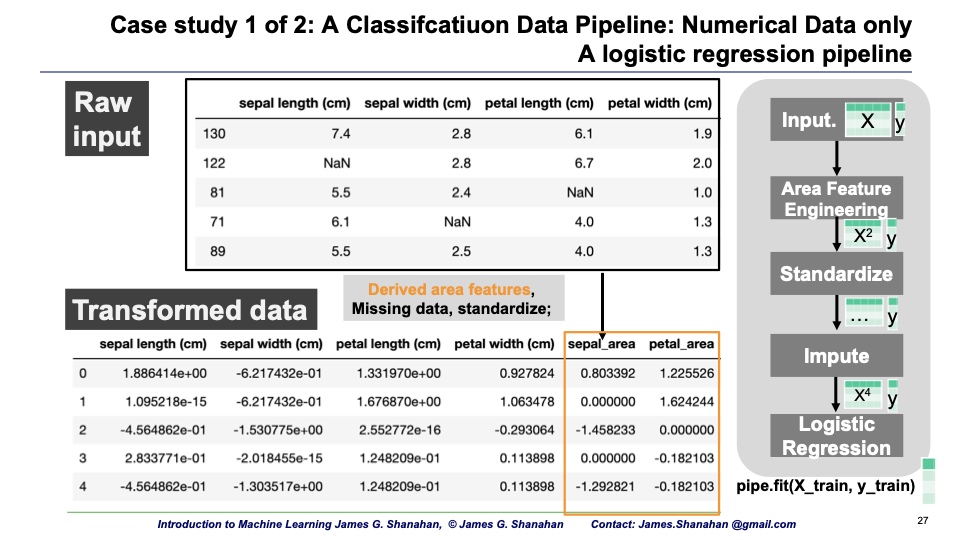

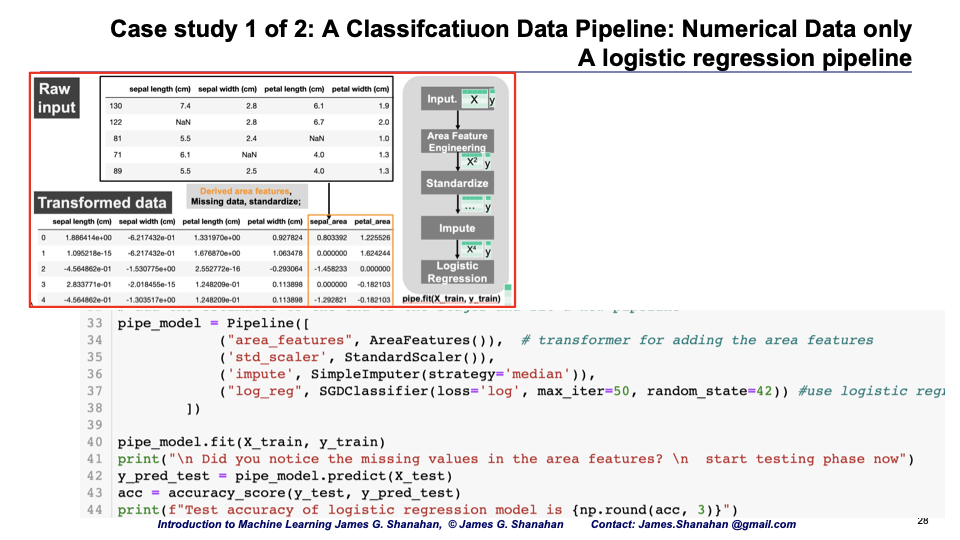

## Splitting the Data, and avoiding common pitfalls 

The absolute *most* important first step to machine learning problems is to properly split the available data into training and testing subsets! Why? Model fit statistics are not a good guide to how well a model will predict on new data. In order to reliably assert how well the model will perform on new data, it is necessary to build an independent objective testset to simulate how the learnt modeling pipeline might perform in the wild (in a production setting). A common way to accomplish this to  "split" the available data into a "training set" and a "testing" set. Typically 10-20% of the data can be set aside for blind (objective) testing purposes.

All exploratory work, transformations and models and their optimisation is done on the  training set only. Once an optimal pipeline is determined  the learnt pipeline can  be applied to the test set. The test set will only be introduced to the final model __ONCE__ as a litmus test as to whether our model will perform to business requirements.

Not properly splitting your data can lead to a number of problems including (but not limited to):

- Over/under-fitting your data
- Distributional differences between train/test splits
- Factor levels present in test split but not train

Things to consider when splitting your data:

- Are there categorical features? If so, do all factor levels exist between splits? How about class imbalance?
- Natural ordering to your data?
  - If the data is split without a shuffle and it's time-series data, what might happen?
  - Imagine taking the first 100 (~66.7% of the data) observations of the `iris` dataset as the training set. What will happen?

    Train set (`species={'setosa', 'versicolor'}`):

    <img src="img/bad_train1.png" alt="Bad train set1" style="width: 500px;"/>

    Test set (`species={'virginica'}`):

    <img src="img/bad_test1.png" alt="Bad test set1" style="width: 500px;"/>

    __Uh oh! The model will be fit on only two classes, and will get everything incorrect on the test set!__
- Is it reproducible?
- How much is enough for each set?
  - Too many examples in train and not enough in test means we don't know how well the model generalizes to new data
  - Too few examples in train and too many in test could lead to under-fitting

## Artificially add missing values to the iris inputs

In [366]:
from sklearn.model_selection import train_test_split  
from sklearn.utils import check_random_state
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# load the data
iris = load_iris()
X = pd.DataFrame.from_records(data=iris.data, columns=iris.feature_names)
y = iris.target
display(X.head(5))

# get a random state for repeatability
seed = 42
random_state = check_random_state(seed)

# create a mask
missing_pct = 0.05
missing_mask = random_state.rand(*X.shape) < missing_pct

# assign the mask as missing values
X = X.where(~missing_mask, other=np.nan)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y)
display(X_train.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
130,7.4,2.8,6.1,1.9
122,7.7,2.8,6.7,2.0
81,5.5,2.4,3.7,1.0
71,6.1,NaN,4.0,1.3
89,NaN,2.5,4.0,1.3


In [28]:
y_train[:5]

array([2, 2, 1, 1, 1])

## Exploratory data analysis (EDA)

### *From here on out, all procedures must be applied to the train set only!*

Now that the data has been split into training and testing, it's time to perform some descriptive and exploratory data analysis (EDA).



### Summarizing data with Pandas

Before we dive into our work, it's valuable to take a look at the data we're working with. Consider the following questions:

  * Is there any data missing?
  * Are there any significant outliers?
  * Are there any redundant features?
  * What is the scale of the features?
  * Are there any categorical features? Or are they all numeric?
  * Wrt feature engineering are there any new features we could invent/derive?
  * What could a significant difference in mean & median indicate?

In [22]:
def summarize(data):
    """Create a summary of the input data including min, max,
    mean, median, num obs missing, IQR, etc.
    
    Parameters
    ----------
    data : pd.DataFrame
        The input dataframe to summarize.
    """
    summ = data.describe()
    
    # get the median, name it
    med = data.median()
    med.name = "median"
    
    # append the median row
    summ = summ.append(med, ignore_index=False)
    
    return summ

summarize(X_train)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
median,5.800000,3.000000,4.350000,1.300000


### What have we observed about `iris`?

1. There are no categorical features
2. There are 150 observations in the data, and none of the features are fully present (i.e., missing values in each)
3. The `petal length (cm)` feature displays a much higher median than mean&mdash;what could that indicate?

## Visual data analysis

In the EDA section, the focus was on purely descriptive statistics. This section looks at some visualizations as well. It's worth noting that "visual analytics" can *NOT* always be performed on data, especially if it's very high dimensional.

#### Visualizing data with Seaborn or Matplotlib

In iPython notebooks, make sure to use the magic `%matplotlib inline` command!

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


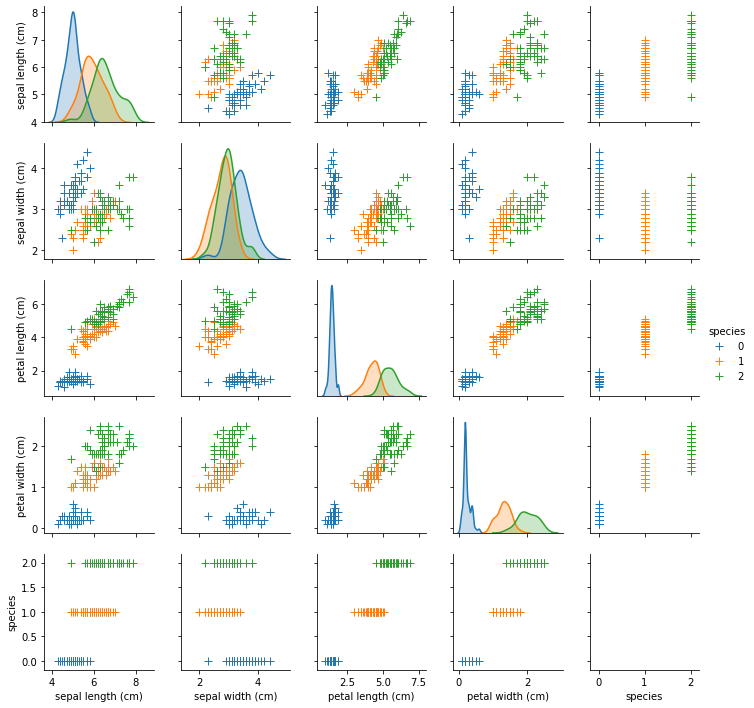

In [23]:
import seaborn as sns
%matplotlib inline

def pairplots(data, target):
    # need to append target
    data = data.copy()
    data['species'] = target.tolist()
    
    # get rid of NA to avoid warnings in seaborn
    data = data.dropna()
    
    # make a KDE pairplot
    sns.pairplot(data, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True), hue='species',
                 size=2)
    
pairplots(X_train, y_train)

Notice the distributional overlaps between different species' features. `setosa` is perfectly linearly separable (meaning you can draw a line to separate classes) from the other two species, but `virginica` and `versicolor` are not.

## What about multi-collinearity?

In statistics [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) is when multiple independent variables are highly related. E.g., think about weight variable in lbs and  a second weight variable weight in kilograms; having both as inputs could potential lead to poor predictions. In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.

In [22]:
# correlation matrix
corr = X_train.corr()

# color map (https://stackoverflow.com/questions/39409866/correlation-heatmap)
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
           ]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1,-0.15,0.89,0.85
sepal width (cm),-0.15,1,-0.45,-0.36
petal length (cm),0.89,-0.45,1,0.96
petal width (cm),0.85,-0.36,0.96,1


Many of the input features are highly correlated like `sepal length` and `petal length`. Here one of these variables can be dropped from the training data with causing too much loss of predictive power.

## Feature engineering: build a  customer transformer to add the area features

In [270]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

#--------------------------------------------------
# Feature engineering
#--------------------------------------------------
# Derive the area features
class AreaFeatures(BaseEstimator, TransformerMixin):
    """derive the area features from the length and width features
       RETURNS
           a dataframe with all input columns + new columns "sepal_area", "petal_area"
    """
    def __init__(self, ):
        pass
        
    def fit(self, X, y=None):
        # stateless transformer that does not depend on the data
        # it is a simple formula that is provided upfront: area = length x height
        return self
    
    def transform(self, X):
        # always copy the input frame - we don't want to
        # impact the original frame in place
        self.col_names = list(X.columns) + ["sepal_area", "petal_area"]
        X = X.copy()
        X["sepal_area"] = X["sepal length (cm)"] * X["sepal width (cm)"]
        X["petal_area"] = X["petal length (cm)"] * X["petal width (cm)"]
        return X
    
    def get_feature_names(self):
        return self.col_names


### Test the transformer 
Test the `area` transformer by creating an instance and doing the fit step, followed by the transform step.

```python
#--------------------------------
# Run the are transformer  step
#--------------------------------
display(X_train.head())
af = AreaFeatures().fit(X_train)
display(af.transform(X_train).head())
```

**Question**: Have a look for the missing values in the `area` features. Why is that?

In [271]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.utils import check_random_state
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd

# load the data
iris = load_iris()
X = pd.DataFrame.from_records(data=iris.data, columns=iris.feature_names)
y = iris.target
# get a random state for repeatability
seed = 42
random_state = check_random_state(seed)

# create a mask
missing_pct = 0.05
missing_mask = random_state.rand(*X.shape) < missing_pct

# assign the mask as missing values
X = X.where(~missing_mask, other=np.nan)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y)

#--------------------------------
# Run the are transformer  step
#--------------------------------
display(X_train.head())
af = AreaFeatures().fit(X_train)
display(af.transform(X_train).head())
print("\n Did you notice the missing values in the area features?")
print (f"DF column names after area features were added: {af.get_feature_names()}")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
130,7.4,2.8,6.1,1.9
122,7.7,2.8,6.7,2.0
81,5.5,2.4,3.7,1.0
71,6.1,NaN,4.0,1.3
89,NaN,2.5,4.0,1.3


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_area,petal_area
130,7.4,2.8,6.1,1.9,20.72,11.59
122,7.7,2.8,6.7,2.0,21.56,13.40
81,5.5,2.4,3.7,1.0,13.20,3.70
71,6.1,NaN,4.0,1.3,NaN,5.20
89,NaN,2.5,4.0,1.3,NaN,5.20



 Did you notice the missing values in the area features?
DF column names after area features were added: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'sepal_area', 'petal_area']


## Building a baseline (single path) pipeline model with a customer transformer

Now that we've covered how to build a pipeline, it's time to add an estimator to the mix and start building models!

In [416]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.utils import check_random_state
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd

# load the data and add some missing data noise
iris = load_iris()
X = pd.DataFrame.from_records(data=iris.data, columns=iris.feature_names)
y = iris.target
# get a random state for repeatability
seed = 42
random_state = check_random_state(seed)

# create a mask
missing_pct = 0.05
missing_mask = random_state.rand(*X.shape) < missing_pct

# assign the mask as missing values
X = X.where(~missing_mask, other=np.nan)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y)


#----------------------------------------------
# function to build the pipeline
#----------------------------------------------
# add the estimator to the end of the stages and fit a new pipeline
pipe_model = Pipeline([
            ("area_features", AreaFeatures()),  # transformer for adding the area features
            ('std_scaler', StandardScaler()),
            ('impute', SimpleImputer(strategy='median')),
            ("log_reg", SGDClassifier(loss='log', max_iter=50, random_state=42)) #use logistic regression
        ])

pipe_model.fit(X_train, y_train)
print("\n Did you notice the missing values in the area features? \n  start testing phase now")
y_pred_test = pipe_model.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy of logistic regression model is {np.round(acc, 3)}")


 Did you notice the missing values in the area features? 
  start testing phase now
Test accuracy of logistic regression model is 0.842


## Visualize a scikit-learn pipeline
Pipeline can be big with scikit-learn, it would be awesome to visualize them programmatically. This functionality is still not present in sklearn. 

This  [link]( http://www.xavierdupre.fr/app/mlinsights/helpsphinx/notebooks/visualize_pipeline.html) provides a good start to visualizing a scikit-learn pipeline.

## Selecting an optimal model via GridSearchCV

Now that we've baselined several models, we can select several to tune in order to find the best hyper-parameters possible for each model. The random forest and SVM performed best on our data (that's not to say we couldn't tune another model to do better), so we'll tune them and ultimately select one over the over as our best model. We do this using a "grid search"

In [364]:
# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
import logging
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted



# load the data and add some missing data noise
iris = load_iris()
X = pd.DataFrame.from_records(data=iris.data, columns=iris.feature_names)
y = iris.target
# get a random state for repeatability
seed = 42
random_state = check_random_state(seed)

# create a mask
missing_pct = 0.05
missing_mask = random_state.rand(*X.shape) < missing_pct

# assign the mask as missing values
X = X.where(~missing_mask, other=np.nan)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y)


#--------------------------------------------------
# Feature engineering
#--------------------------------------------------
# Derive the area features
class AreaFeatures(BaseEstimator, TransformerMixin):
    """derive the area features from the length and width features
       RETURNS
           a dataframe with all input columns + new columns "sepal_area", "petal_area"
    """
    def __init__(self, ):
        pass
        
    def fit(self, X, y=None):
        # stateless transformer that does not depend on the data
        # it is a simple formula that is provided upfront: area = length x height
        return self
    
    def transform(self, X):
        # always copy the input frame - we don't want to
        # impact the original frame in place
        self.col_names = list(X.columns) + ["sepal_area", "petal_area"]
        X = X.copy()
        X["sepal_area"] = X["sepal length (cm)"] * X["sepal width (cm)"]
        X["petal_area"] = X["petal length (cm)"] * X["petal width (cm)"]
        return X
    
    def get_feature_names(self):
        return self.col_names
    
hyper_parameters = { #listed in the form of "step__parameter", e.g, clf__penalty
    'imputer__strategy': ['mean', 'median'],
    'clf__alpha': (0.0001, 0.00001, 0.000001),
    'clf__penalty': ('l1', 'l2', 'elasticnet'),
}

# the pipe we'll use
lr_pipe = Pipeline([
        ("area_features", AreaFeatures()),  # transformer for adding the area features
        ('imputer', SimpleImputer()),
        ('clf', SGDClassifier(loss='log', max_iter=50,  random_state=42)),  #let's use logistic regression
    ])


cv_folds=3
# define the hyperparameter search
lr_best = GridSearchCV(lr_pipe, hyper_parameters, cv=cv_folds,
                               n_jobs=-1, verbose=1, scoring='accuracy',
                               return_train_score=True,
                      iid = False )

print("Performing grid search...")
print("pipeline:", [name for name, _ in lr_pipe.steps])
print("parameters:")
pprint(hyper_parameters)

print("-"*60)
print(f"Number of different experiments is : {np.product([len(hyper_parameters[k]) for k in hyper_parameters])}")
print(f"Number of pipelines to estimate is : {1+ cv_folds*np.product([len(hyper_parameters[k]) for k in hyper_parameters])}")
print("-"*60)


t0 = time()
lr_best.fit(X_train, y_train)
print("\n\n\n"+"-"*60)
print("done in %0.3fs" % (time() - t0))
print()
print("cross validaion score for best hyperparameter combo is : %0.3f" % lr_best.best_score_)
print("Best parameters set:")
best_parameters = lr_best.best_estimator_.get_params()
for param_name in sorted(hyper_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
y_pred_test = lr_best.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy of logistic regression model is {np.round(acc, 3)}")
print("-"*60)



Performing grid search...
pipeline: ['area_features', 'imputer', 'clf']
parameters:
{'clf__alpha': (0.0001, 1e-05, 1e-06),
 'clf__penalty': ('l1', 'l2', 'elasticnet'),
 'imputer__strategy': ['mean', 'median']}
------------------------------------------------------------
Number of different experiments is : 18
Number of pipelines to estimate is : 55
------------------------------------------------------------
Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.





------------------------------------------------------------
done in 1.225s

cross validaion score for best hyperparameter combo is : 0.876
Best parameters set:
	clf__alpha: 0.0001
	clf__penalty: 'l1'
	imputer__strategy: 'mean'
Test accuracy of logistic regression model is 0.921
------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.2s finished


In [363]:
hyper_parameters["imputer__strategy"]

['mean', 'median']

## Model persistence

At this point, you have spent a considerable amount of time putting together a modeling pipeline that will handle your raw data and feed it through to your estimator. You've even cross-validated and tuned the model to make sure you get the best one possible.

__*What next?*__

It's time to persist our model pipeline to disk! Scikit-learn allows us to easily pickle the entire modeling pipeline.

In [101]:
from sklearn.externals import joblib
import os

# if it's already there, get rid of it
otpt_file = 'iris.pkl'
if os.path.exists(otpt_file):
    os.unlink(otpt_file)

# dump the model into a pickle file
joblib.dump(lr_best, otpt_file, compress=3)
assert os.path.exists(otpt_file)

Once the model is on disk, we can easily load and generate predictions like so:

In [102]:
joblib.load(otpt_file).predict(X_test)[:50]

array([0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1])

In [104]:
# reload the lr pipeline
lr_best = joblib.load(otpt_file)
y_pred_test = lr_best.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy of logistic regression model is {np.round(acc, 3)}")


Test accuracy of logistic regression model is 0.921


# Pipeline for heterogenous data: ColumnTransformer

Many datasets contain features of different types, such as text features (e.g., tweats, reviews), floats, and dates, images, where each type of feature requires separate preprocessing or feature extraction steps. Often it is easiest to preprocess data before applying scikit-learn methods, for example using pandas. HOWEVER, processing your data before passing it to scikit-learn for machine learning purposes might be problematic:

* **Data leakage**: Incorporating statistics from test data into the preprocessors makes cross-validation scores unreliable, for example in the case of scalers or imputing missing values. This is known as data leakage.
* deploying such a framework with separate modules for preprocessing the data, and for machine learning  may lead to data integrity challenges (more difficult to  unit test and system test the machine learning system end to end).

One could transform each column or subset of columns separately and then stitch them together, or one can use `ColumnTransformer` to do that work more seamlessly. The [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer) class helps avoid data integrity issues by integrating all transformer steps into a computational graph that has multiple paths from the input dataset to the modeling step, where each intermediate path corresponds to the local transformation of a subset of the input features. For a visual on this see the figure below. Think of `ColumnTransformer`   as a aggregate-level transformer that manages local transformers that each work on subsets of the data (coresponding to subsets of the features). This enables the creation of a data tranformation pipeline where different columns can be transformed with local subpipelines (that are consist of a single step or multiple  steps). In general, this enables the following possible scenarios:

* one can process a combination of categorical and numerical features using different subpipelines, say, one for numercial data, and one for categorical data
* one can to use different imputation strategies to fill missing data (`np.nans`/`None`) for different numeric columns (e.g., imputing missing ratings data (e.g., use an average rating by item)  is very different different than imputing missing temperatures (e.g., one might use an average or moving average of the temperature)
* moving beyond categorical and numerical feature,  one can now have different subpipelines, for other types of hetrogenous data such as images, text, sound, retail data, review data, etc.

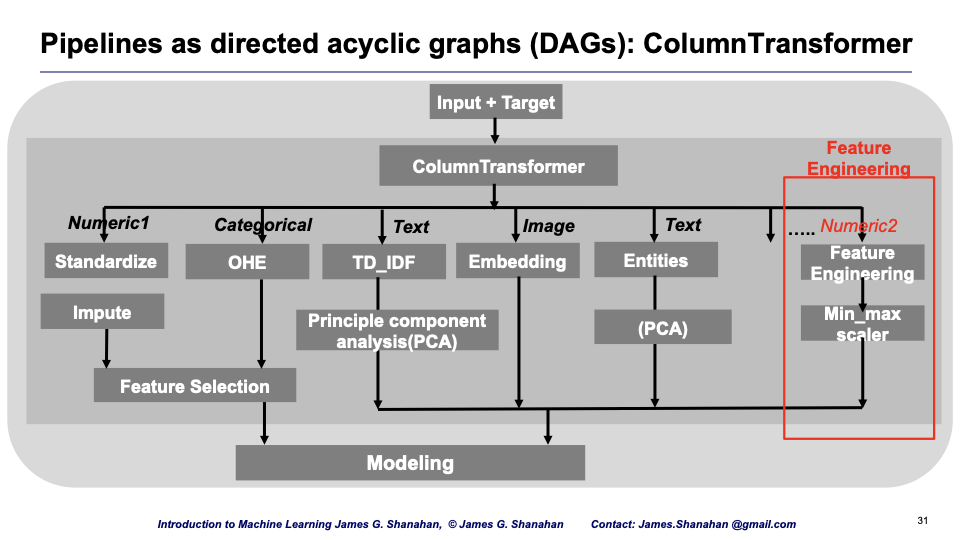

**Figure: A pipeline as a composition of the data transformation (sub)pipelines, that is orchestrated by the `ColumnTransformer` class. Here each path from the input datas to the final step in the pipeline, the modeling step, focuses on a subset of the input features (e.g., the textual reviews feature could be processed by the TF_IDF subpipeline).** 

The `ColumnTransformer` is an aggregate level class that enables the orchestration of custom/builting transformations for different column subsets of the data, within a Pipeline that is safe from data leakage and that can be parametrized and thereby optimised via processes such as gridsearch. [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer) accepts as input  arrays, sparse matrices, and pandas DataFrames.

## An example ColumnTransformer based  on built-in transformers
A ColumnTransformer works on base transformers that perform the data preprocessing, and feature engineering for subsets of the input data. Below is an exmaple of ColumnTransformer based  on built-in transformers only (i.e., no custom transformers are used).
As seen previously, the `ColumnTransformer` class is aggregate-level transformer that enables the creation of a data pipeline whereby different columns can be transformed with local subpipelines (that are consist of a single step or multiple  steps). 

The following example, accepts as input:
* weekday (0–6 Monday-Sunday), 
* hour (0–23), 
* and maximum, average, and minimum daily temperature

The following shows how to standardize the temperature features and to one-hot-encode the `weekday` and `hour` features. Assuming input and target DataFrames (X_train, y_train) are already loaded:

```python
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
# define column transformer and set n_jobs to use all cores
col_transformer = ColumnTransformer(
                    transformers=[
                        # (name, transformer,     columns) 
                        ('ss', StandardScaler(), ['max_temp', 
                                                  'avg_temp', 
                                                  'min_temp']),
                        ('ohe', OneHotEncoder(), ['weekday', 
                                                  'hour'])
                    ],
                    remainder='drop',   # ignore any other input features
                    n_jobs=-1           # parallelize the processing of each of the subpipelines
                    )
```

Once create custom transformer (consisting of the `ColumnTransformer` step) is ready to be fitted and used to transform data:

```python
X_train_transformed = col_transformer.fit_transform(X_train)
```
This outputs 
```
<465x30 sparse matrix of type '<class 'numpy.float64'>'
	with 2325 stored elements in Compressed Sparse Row format>
```
Generally,  the `ColumnTransformer` will be  a step in a modeling Pipeline:

```python
lr = LinearRegression()
pipe = Pipeline([
            ("preprocessing", col_transformer),
            ("lr", lr)
       ])
pipe.fit(X_train, y_train)
```

ColumnTransformer takes the input data  and pipes it through each transformer sub-pipeline separately (and in parallel if the `n_jobs` is set to `-1`. 

Be careful that the output of the combined transformer is a concatenation of the different transformers in the order in which the transformers are listed `ColumnTransformer( transformers=[...])`. 

### Tip: Keep track of your column names
When transforming data with complex graphs, it is important to manage the  columns names (input feature names). The order of the columns in the transformed feature matrix follows the order of how the columns are specified in the transformers list of the `ColumnTransformer` object. Columns of the original feature matrix that are not specified are dropped from the resulting transformed feature matrix, unless specified in the passthrough keyword. Those columns specified with passthrough are added at the right to the output of the transformers. Note that features that are not piped through transformers can either be dropped or kept in the mix by using the `remaineder` attribute:  

```python
remainder='drop',   # ignore any other input features
```
For more background, see [here](https://scikit-learn.org/stable/modules/compose.html#featureunion-composite-feature-spaces).

To each column, a different transformation pipeline can be applied, such as preprocessing or a specific feature extraction method. Consider the following small example:

In [24]:
import pandas as pd
X = pd.DataFrame(
    {'city': ['London', 'London', 'Paris', 'Sallisaw'],
     'title': ["His Last Bow", "How Watson Learned the Trick",
               "A Moveable Feast", "The Grapes of Wrath"],
     'expert_rating': [5, 3, 4, 5],
     'user_rating': [4, 5, 4, 3]})
display(X)

,city,title,expert_rating,user_rating
0,London,His Last Bow,5,4
1,London,How Watson Learned the Trick,3,5
2,Paris,A Moveable Feast,4,4
3,Sallisaw,The Grapes of Wrath,5,3


For this data, the following code transforms the input dataframe as follows:
* the `city` column can be treated as a categorical variable and can be transformed using `OneHotEncoder`. 
* the `title` column can be process using a `feature_extraction.text.CountVectorizer` 
* multiple  feature extraction methods can be applied to the same column. For example, the `title` can be processed by different tansformers:  treat the `title` column as a bag of words leading to `title_bow` transformer; or extract nouns from the `title` column. 

By default, the remaining rating columns are ignored (remainder='drop'):

* the  columns, `expert_rating` and `user_rating` are dropped from future consideration in the following (as `remainder='drop'`).  They could be assigned to separate transformer and could  be treated as numerical variables that are standardize. 


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

column_trans = ColumnTransformer(
    [('city_category', OneHotEncoder(dtype='int'),['city']),
     ('title_bow', CountVectorizer(), 'title')],
    remainder='drop')

print("-"*60)
print(f"column_trans.fit(X) :{column_trans.fit(X)}\n")
print("-"*60)
print(f"column_trans.get_feature_names() :{list(column_trans.get_feature_names())}\n")
print("-"*60)
print(f"column_trans.transform(X).toarray(): \n{column_trans.transform(X).toarray()}\n")
print("-"*60)
display(pd.DataFrame(column_trans.transform(X).toarray(), columns=column_trans.get_feature_names()))

------------------------------------------------------------
column_trans.fit(X) :ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('city_category',
                                 OneHotEncoder(categorical_features=None,
                                               categories=None, drop=None,
                                               dtype='int',
                                               handle_unknown='error',
                                               n_values=None, sparse=True),
                                 ['city']),
                                ('title_bow',
                                 CountVectorizer(analyzer='word', binary=False,
                                                 decode_error='strict',
                                                 dtype=<class 'numpy.int64'>,
                                                 encoding='utf-8',
          

,city_category__x0_London,city_category__x0_Paris,city_category__x0_Sallisaw,title_bow__bow,title_bow__feast,title_bow__grapes,title_bow__his,title_bow__how,title_bow__last,title_bow__learned,title_bow__moveable,title_bow__of,title_bow__the,title_bow__trick,title_bow__watson,title_bow__wrath
0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0
2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1


In the above example, 

* the` CountVectorizer expects` a 1D array as input and therefore the columns were specified as a string ('title').
* However, `preprocessing.OneHotEncoder` as most of other transformers expects 2D data, therefore in this case one needs to specify the column as a list of strings `(['city'])`.

## column selection depends on the input type: slice, enumerate, name
Apart from a scalar or a single item list, the column selection can be specified as a list of multiple items, an integer array, a slice, or a boolean mask. 

* Strings can reference columns if the input is a DataFrame, 
* integers are always interpreted as the positional columns.

### The `remainder` parameter
We can keep the remaining rating columns by setting remainder='passthrough'. The values are appended to the end of the transformation.

In [26]:
column_trans = ColumnTransformer(
    [('city_category', OneHotEncoder(dtype='int'),['city']),
     ('title_bow', CountVectorizer(), 'title')],
    remainder='passthrough')

#note: AttributeError: 'ColumnTransformer' object has no attribute 'named_steps'
# so we have to manually assemble the columns from the individual transformers
display(pd.DataFrame(column_trans.fit_transform(X), 
                     columns=
                     list(column_trans.named_transformers_['city_category'].get_feature_names())  +
                     list(column_trans.named_transformers_['title_bow'].get_feature_names())  +
                     ['expert_rating', 'user_rating']))

,x0_London,x0_Paris,x0_Sallisaw,bow,feast,grapes,his,how,last,learned,moveable,of,the,trick,watson,wrath,expert_rating,user_rating
0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,5,4
1,1,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,3,5
2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,4,4
3,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,5,3


### The remainder parameter can be set to an estimator
The `remainder` parameter can be set to an estimator to transform the remaining rating columns. The transformed values are appended to the end of the transformation.

In [22]:
from sklearn.preprocessing import MinMaxScaler
column_trans = f

#column_trans.fit_transform(X)[:, -2:]
#note: AttributeError: 'ColumnTransformer' object has no attribute 'named_steps'
# so we have to manually assemble the columns from the individual transformers
display(pd.DataFrame(column_trans.fit_transform(X), 
                     columns=
                     list(column_trans.named_transformers_['city_category'].get_feature_names())  +
                     list(column_trans.named_transformers_['title_bow'].get_feature_names())  +
                     ['expert_rating', 'user_rating']))


,x0_London,x0_Paris,x0_Sallisaw,bow,feast,grapes,his,how,last,learned,moveable,of,the,trick,watson,wrath,expert_rating,user_rating
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


## make_column_transformer
The `make_column_transformer` function is available to more easily create a `ColumnTransformer object` (like make_pipeline. Specifically, the names will be given automatically. In the following the `OneHotEncoder(), ['city'])` transformer,  will be assigned the name `onehotencoder`, i.e., the classname all lower-cased. 

The following code would yield a master ColumnTransformer equivalent to example above:

In [101]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(), ['city']),    #will be assigned the name onehotencoder
    (CountVectorizer(), 'title'),
    remainder=MinMaxScaler())
column_trans

ColumnTransformer(n_jobs=None,
         remainder=MinMaxScaler(copy=True, feature_range=(0, 1)),
         sparse_threshold=0.3, transformer_weights=None,
         transformers=[('onehotencoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True), ['city']), ('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dty...accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None), 'title')])

# FeatureUnion: composite feature spaces (optional: we dont use)

`FeatureUnion` provides an alternative aggregate transformer. It has one weakness compared to `ColumnTransformer`; it takes all data as input, whereas ColumnTransformer can pipe subsets of columns to each sub-pipeline. It is recommended NOT to use `FeatureUnion`.

A FeatureUnion object functionality conists of :
* A FeatureUnion takes a list of transformer objects. 
* During fitting, each of these is fit to the data independently. 
* The transformers are applied in parallel, and the feature matrices they output are concatenated side-by-side into a larger matrix.

When you want to apply different transformations to each field of the data, see the related class `sklearn.compose.ColumnTransformer` which is discussed in the next section.

FeatureUnion serves the same purposes as Pipeline - convenience and joint parameter estimation and validation.

FeatureUnion and Pipeline can be combined to create complex models.

(A FeatureUnion has no way of checking whether two transformers might produce identical features. It only produces a union when the feature sets are disjoint, and making sure they are the caller’s responsibility.)

## Cons of FeatureUnion
`sklearn.compose.ColumnTransformer` which is discussed in the previous section has a much cleaner way of expressing pipeline DAGs (handle multiple transformations of data; it applies the appropriate transformations to each column subset). The `FeatureUnion` class provides an alternative way to accomplish this, again by applying different transformers and concatenating their outputs. **BUT  you cannot** specify different columns for each transformer; they all apply to the all the data. It is possible to work around this limitation using a custom transformer for column selection like the following class `DataFrameSelector`.

```python 
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

# Create a pipeline for the numeric features.
# Use DataFrameSelector with the numeric features defined above
# Use StandardScaler() to standardize the data
# Missing values will be imputed using the feature median.
#==================================================#
#               Your code starts here              #
#==================================================#
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
``` 
    
 

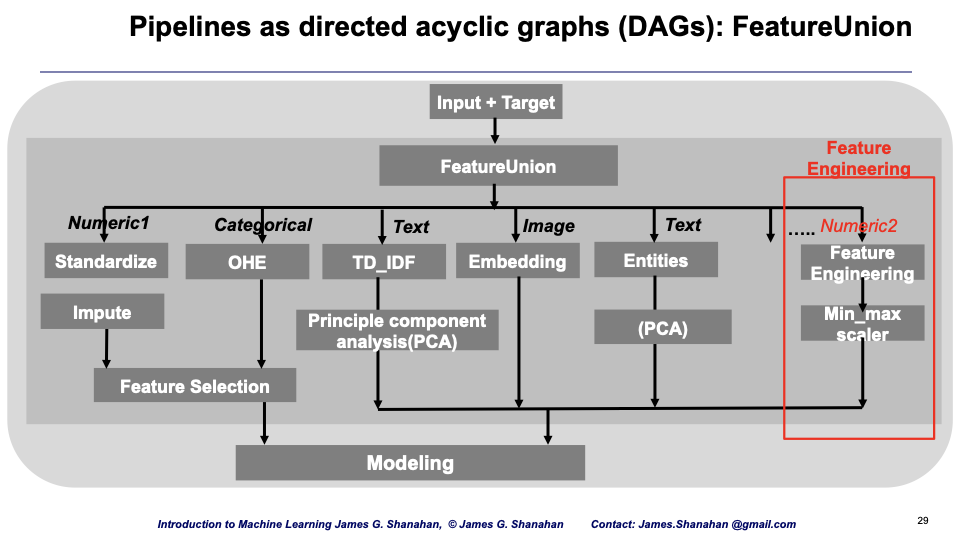

**Figure: A pipeline as a composition of the data transformation (sub)pipelines, that is orchestrated by the `FeatureUnion` class. Here each path from the input datas to the final step in the pipeline, the modeling step, focuses on a subset of the input features (e.g., the textual reviews feature could be processed by the TF_IDF subpipeline).** 

A FeatureUnion is built using a list of (key, value) pairs, where the key is the name you want to give to a given transformation (an arbitrary string; it only serves as an identifier) and value is an estimator object:

```python
>>>
>>> from sklearn.pipeline import FeatureUnion
>>> from sklearn.decomposition import PCA
>>> from sklearn.decomposition import KernelPCA
>>> estimators = [('linear_pca', PCA()), ('kernel_pca', KernelPCA())]
>>> combined = FeatureUnion(estimators)
>>> combined 
FeatureUnion(n_jobs=None,
             transformer_list=[('linear_pca', PCA(copy=True,...)),
                               ('kernel_pca', KernelPCA(alpha=1.0,...))],
             transformer_weights=None)
```

Like pipelines, feature unions have a shorthand constructor called make_union that does not require explicit naming of the components.

## Skip steps in the pipeline or replace
Like Pipeline, individual steps may be replaced using set_params, and ignored by setting to 'drop':

```python
>>>
>>> combined.set_params(kernel_pca='drop')
... 
FeatureUnion(n_jobs=None,
             transformer_list=[('linear_pca', PCA(copy=True,...)),
                               ('kernel_pca', 'drop')],
             transformer_weights=None)
```

Examples:

* [Concatenating multiple feature extraction methods](https://scikit-learn.org/stable/auto_examples/compose/plot_feature_union.html#sphx-glr-auto-examples-compose-plot-feature-union-py)

## Case Study: Iris dataset $PCA \rightarrow SelectBest \rightarrow SVM\_Classifier$

In many real-world examples, there are many ways to extract features from a dataset. Often it is beneficial to combine several methods to obtain good performance. This example shows how to use FeatureUnion to combine features obtained by PCA and univariate selection.

Combining features using this transformer has the benefit that it allows cross validation and grid searches over the whole process.

The combination used in this example is not particularly helpful on this dataset and is only used to illustrate the usage of FeatureUnion.

### Reference
* https://scikit-learn.org/stable/auto_examples/compose/plot_feature_union.html#sphx-glr-auto-examples-compose-plot-feature-union-py

In [200]:
# Author: Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 clause

from __future__ import print_function
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

iris = load_iris()

X, y = iris.data, iris.target

# This dataset is way too high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some original features where good, too?
selection = SelectKBest(k=1)

# Build estimator from PCA and Univariate selection:
# LOOK AT ALL FEATURES (YOU NEED TO SUBSET YOURSELF)
# ColumnTransformer IS BETTER
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit(X, y).transform(X)
print("Combined space has", X_features.shape[1], "features")

svm = SVC(kernel="linear")

# Do grid search over k, n_components and C:

pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=10)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

Combined space has 3 features
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.9333333333333333, total=   0.1s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.9333333333333333, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.8666666666666667, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.9333333333333333, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=1.0, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.8666666666666667, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.9333333333333333, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=1.0, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=10, score=0.9333333333333333, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=10, score=

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.9s finished


# Casestudy 2 of 2: multipath pipelines for categorical and numerical features using `ColumnTransformer`

The goal of this section to work on slightly revved up iris dataset and model the classification task with a pretty sophistical pipeline:
* artificially add sepal_size feature that has three possible values: small, medium, and large. 
* In addition, some of the numerical data has been artificially (randomly) set to `missing`.

The main steps in the pipeline are depicted below:

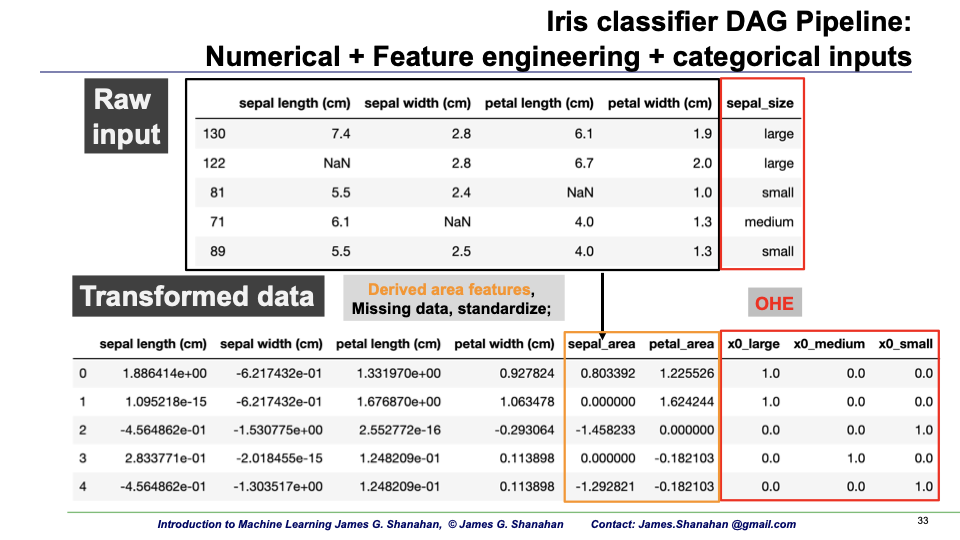

## Create an artificial categorical input feature for the iris dataset

Here an artificial categorical feature based on sepal area is added. It has three possible values: `small`, `medium`, and `large`. In addition, some of the numerical data has been set to missing. This is done for pedagogical reasons and serves no real predictive value. 


###### 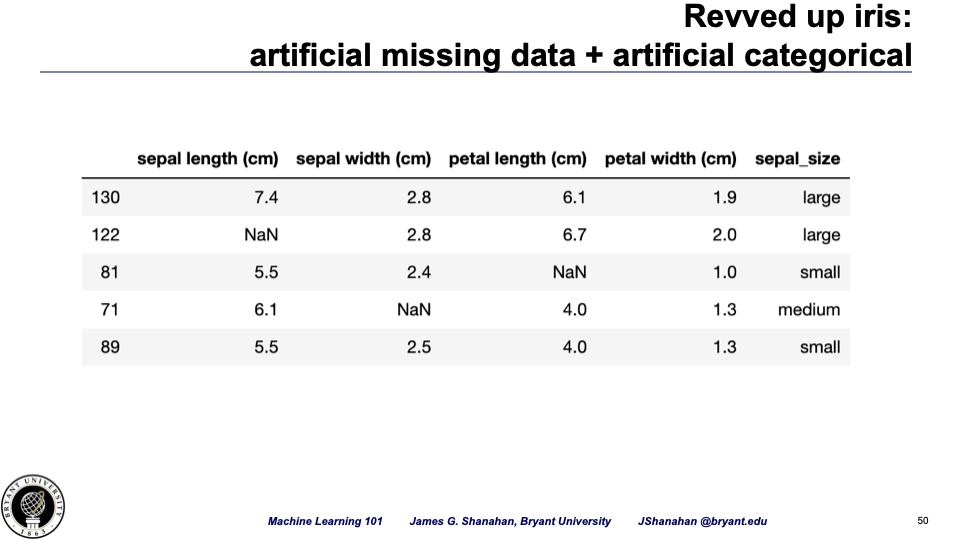
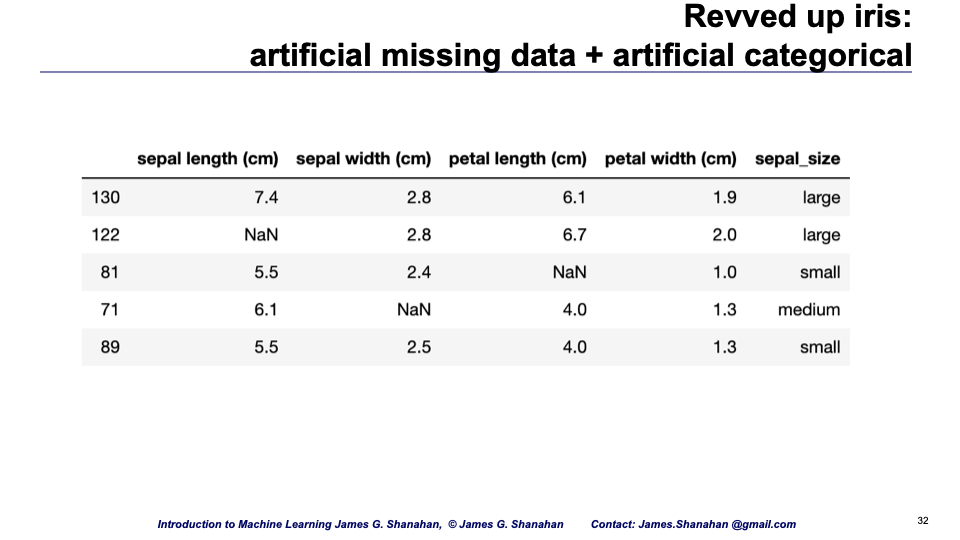

### Background:  If you have more than two conditions then use `np.select` to assign values 

For example, if you want color to be

``` python
yellow when (df['Set'] == 'Z') & (df['Type'] == 'A')
otherwise blue when (df['Set'] == 'Z') & (df['Type'] == 'B')
otherwise purple when (df['Type'] == 'B')
otherwise black,

```

Then use the following:

In [148]:
df = pd.DataFrame({'Type':list('ABBC'), 'Set':list('ZZXY')})
display(df)
conditions = [
    (df['Set'] == 'Z') & (df['Type'] == 'A'),
    (df['Set'] == 'Z') & (df['Type'] == 'B'),
    (df['Type'] == 'B')]
choices = ['yellow', 'blue', 'purple']
df['color'] = np.select(conditions, choices, default='black')
print(df)

,Type,Set
0,A,Z
1,B,Z
2,B,X
3,C,Y


  Type Set   color
0    A   Z  yellow
1    B   Z    blue
2    B   X  purple
3    C   Y   black


In [358]:
# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from pprint import pprint
from time import time
import logging
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder



# load the data and add some missing data noise
iris = load_iris()
X = pd.DataFrame.from_records(data=iris.data, columns=iris.feature_names)
y = iris.target

# add an artificial categorical features based on sepal area
# this is done for pedagogical reasons and serves no reason predictive value 
#
X["sepal_area"] = X["sepal length (cm)"] * X["sepal width (cm)"]
conditions = [
    (X["sepal_area"] <  15.),
    (X["sepal_area"] >= 15) & (X["sepal_area"] <20),
    (X["sepal_area"] >= 20.) ]
choices = ['small', 'medium', 'large']
X["sepal_size"] = np.select(conditions, choices, default="problem")
X.drop(["sepal_area"], axis = 1, inplace=True)


# get a random state for repeatability
seed = 42
random_state = check_random_state(seed)

# create a mask
missing_pct = 0.05
missing_mask = random_state.rand(*X.shape) < missing_pct
missing_mask[:,4] = False  #keep all the sepal_size classes
# assign the mask as missing values
X = X.where(~missing_mask, other=np.nan)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y)
display(X_train.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_size
130,7.4,2.8,6.1,1.9,large
122,NaN,2.8,6.7,2.0,large
81,5.5,2.4,NaN,1.0,small
71,6.1,NaN,4.0,1.3,medium
89,5.5,2.5,4.0,1.3,small


## Create a data prep pipeline for with custom, categorical, & numerical transfromers



In [355]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from pprint import pprint
from time import time
import logging
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder



# load the data and add some missing data noise
iris = load_iris()
X = pd.DataFrame.from_records(data=iris.data, columns=iris.feature_names)
y = iris.target

# add an artificial categorical features based on sepal area
# this is done for pedagogical reasons and serves no reason predictive value 
#
X["sepal_area"] = X["sepal length (cm)"] * X["sepal width (cm)"]
conditions = [
    (X["sepal_area"] <  15.),
    (X["sepal_area"] >= 15) & (X["sepal_area"] <20),
    (X["sepal_area"] >= 20.) ]
choices = ['small', 'medium', 'large']
X["sepal_size"] = np.select(conditions, choices, default="problem")
X.drop(["sepal_area"], axis = 1, inplace=True)


# get a random state for repeatability
seed = 42
random_state = check_random_state(seed)

# create a mask
missing_pct = 0.05
missing_mask = random_state.rand(*X.shape) < missing_pct
missing_mask[:,4] = False  #keep all the sepal_size classes
# assign the mask as missing values
X = X.where(~missing_mask, other=np.nan)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y)

#--------------------------------------------------
# Feature engineering
#--------------------------------------------------
# Derive the area features
class AreaFeatures(BaseEstimator, TransformerMixin):
    """derive the area features from the length and width features
       RETURNS
           a dataframe with all input columns + new columns "sepal_area", "petal_area"
    """
    def __init__(self, ):
        pass
        
    def fit(self, X, y=None):
        # stateless transformer that does not depend on the data
        # it is a simple formula that is provided upfront: area = length x height
        return self
    
    def transform(self, X):
        # always copy the input frame - we don't want to
        # impact the original frame in place
        self.col_names = list(X.columns) + ["sepal_area", "petal_area"]
        X = X.copy()
        X["sepal_area"] = X["sepal length (cm)"] * X["sepal width (cm)"]
        X["petal_area"] = X["petal length (cm)"] * X["petal width (cm)"]
        return X
    
    def get_feature_names(self):
        return self.col_names


cat_attributes = ["sepal_size"]
num_attributes = list(X.columns)  # numerical features
num_attributes.remove(cat_attributes[0])

num_pipeline = Pipeline([
        ("area_features", AreaFeatures()),  # transformer for adding the area features
        ('std_scaler', StandardScaler()),
        ('imputer', SimpleImputer())
    ])

#the cat_pipeline is not necessary here
cat_pipeline = Pipeline([
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])
  
#data_pipeline = FeatureUnion(transformer_list=[ #old way
#        ("num_pipeline", num_pipeline),
#        ("cat_pipeline", cat_pipeline),
#    ])
data_pipeline = ColumnTransformer( transformers= [
        # (name, transformer,     columns)
        ("num", num_pipeline, num_attributes),
        ("ohe", OneHotEncoder(), cat_attributes)],
         remainder='drop',
        n_jobs=-1
    )


#----------------------------------------------------------
# Have a look at how the transformed data might look
#----------------------------------------------------------
curious = False
if (curious): print(data_pipeline)

X_train_transformed = data_pipeline.fit_transform(X_train, y_train)
print(f"X_train_transformed type is : {type(X_train_transformed)}")

# Assemble the column names 
# see https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260
cat_one_hot_attributes= data_pipeline.named_transformers_['ohe'].get_feature_names()
num_attributes = data_pipeline.named_transformers_['num'].named_steps["area_features"].get_feature_names()
attribute_names = num_attributes + list(cat_one_hot_attributes)

print(f"-------------RAW input data")
display(X_train.head())
print(f"-------------transformed data")
display(pd.DataFrame(X_train_transformed, columns=attribute_names).head())


X_train_transformed type is : <class 'numpy.ndarray'>
-------------RAW input data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_size
130,7.4,2.8,6.1,1.9,large
122,NaN,2.8,6.7,2.0,large
81,5.5,2.4,NaN,1.0,small
71,6.1,NaN,4.0,1.3,medium
89,5.5,2.5,4.0,1.3,small


-------------transformed data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_area,petal_area,x0_large,x0_medium,x0_small
0,1.886414e+00,-6.217432e-01,1.331970e+00,0.927824,0.803392,1.225526,1.0,0.0,0.0
1,1.095218e-15,-6.217432e-01,1.676870e+00,1.063478,0.000000,1.624244,1.0,0.0,0.0
2,-4.564862e-01,-1.530775e+00,2.552772e-16,-0.293064,-1.458233,0.000000,0.0,0.0,1.0
3,2.833771e-01,-2.018455e-15,1.248209e-01,0.113898,0.000000,-0.182103,0.0,1.0,0.0
4,-4.564862e-01,-1.303517e+00,1.248209e-01,0.113898,-1.292821,-0.182103,0.0,0.0,1.0


## Gridsearch with a pipeline that has numeric, derived area features, and categorical features


In [365]:
# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from pprint import pprint
from time import time
import logging
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder



# load the data and add some missing data noise
iris = load_iris()
X = pd.DataFrame.from_records(data=iris.data, columns=iris.feature_names)
y = iris.target

# add an artificial categorical features based on sepal area
# this is done for pedagogical reasons and serves no reason predictive value 
#
X["sepal_area"] = X["sepal length (cm)"] * X["sepal width (cm)"]
conditions = [
    (X["sepal_area"] <  15.),
    (X["sepal_area"] >= 15) & (X["sepal_area"] <20),
    (X["sepal_area"] >= 20.) ]
choices = ['small', 'medium', 'large']
X["sepal_size"] = np.select(conditions, choices, default="problem")
X.drop(["sepal_area"], axis = 1, inplace=True)


# get a random state for repeatability
seed = 42
random_state = check_random_state(seed)

# create a mask to artificially create missing data for the 
# numerical features
missing_pct = 0.05
missing_mask = random_state.rand(*X.shape) < missing_pct
missing_mask[:,4] = False  #keep all the sepal_size classes
# assign the mask as missing values
X = X.where(~missing_mask, other=np.nan)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y)

#--------------------------------------------------
# Feature engineering
#--------------------------------------------------
# Derive the area features
class AreaFeatures(BaseEstimator, TransformerMixin):
    """derive the area features from the length and width features
       RETURNS
           a dataframe with all input columns + new columns "sepal_area", "petal_area"
    """
    def __init__(self, ):
        pass
        
    def fit(self, X, y=None):
        # stateless transformer that does not depend on the data
        # it is a simple formula that is provided upfront: area = length x height
        return self
    
    def transform(self, X):
        # always copy the input frame - we don't want to
        # impact the original frame in place
        self.col_names = list(X.columns) + ["sepal_area", "petal_area"]
        X = X.copy()
        X["sepal_area"] = X["sepal length (cm)"] * X["sepal width (cm)"]
        X["petal_area"] = X["petal length (cm)"] * X["petal width (cm)"]
        return X
    
    def get_feature_names(self):
        return self.col_names

cat_attributes = ["sepal_size"]
num_attributes = list(X.columns)  # numerical features
num_attributes.remove(cat_attributes[0])

num_pipeline = Pipeline([
        ("area_features", AreaFeatures()),  # transformer for adding the area features
        ('imputer', SimpleImputer()),
        ('std_scaler', StandardScaler()),
    ])

data_pipeline = ColumnTransformer( transformers= [
        # (name, transformer,     columns)
        ("num", num_pipeline, num_attributes),
        ("ohe", OneHotEncoder(), cat_attributes)],
         remainder='drop',
        n_jobs=-1
    )

# the pipe we'll use
lr_pipe = Pipeline([
        ("data_pipeline", data_pipeline),  # do all the data transformations
        ('clf', SGDClassifier(loss='log', max_iter=50,  random_state=42)),  #let's use logistic regression
    ])

#----------------------------------------------------------
# Have a look at how the transformed data might look
#----------------------------------------------------------
curious = False
if (curious): print(data_pipeline)

X_train_transformed = data_pipeline.fit_transform(X_train, y_train)
print(f"X_train_transformed type is : {type(X_train_transformed)}")

# Assemble the column names 
# see https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260
cat_one_hot_attributes= data_pipeline.named_transformers_['ohe'].get_feature_names()
num_attributes = data_pipeline.named_transformers_['num'].named_steps["area_features"].get_feature_names()
attribute_names = num_attributes + list(cat_one_hot_attributes)

print(f"-------------RAW input data")
display(X_train.head())
print(f"-------------transformed data")
display(pd.DataFrame(X_train_transformed, columns=attribute_names).head())




# the pipe we'll use
lr_pipe = Pipeline([
        ("data_pipeline", data_pipeline),  # do all the data transformations
        ('clf', SGDClassifier(loss='log', max_iter=50,  random_state=42)),  #let's use logistic regression
    ])

hyper_parameters = { #listed in the form of "step__parameter", e.g, clf__penalty
    #'imputer__strategy': ['mean', 'median'],
    'clf__alpha': (0.0001, 0.00001, 0.000001),
    'clf__penalty': ('l1', 'l2', 'elasticnet'),
}
# define the hyperparameter search
cv_folds=3
lr_best = GridSearchCV(lr_pipe, hyper_parameters, cv=cv_folds,
                               n_jobs=-1, verbose=1, scoring='accuracy',
                               return_train_score=True, 
                      iid = False )
lr_best.fit(X_train, y_train)


print("Performing grid search...")
print("pipeline:", [name for name, _ in lr_pipe.steps])
print("parameters:")
pprint(hyper_parameters)

print("-"*60)
print(f"Number of different experiments is : {np.product([len(hyper_parameters[k]) for k in hyper_parameters])}")
print(f"Number of pipelines to estimate is : {1+ cv_folds*np.product([len(hyper_parameters[k]) for k in hyper_parameters])}")
print("-"*60)


t0 = time()
lr_best.fit(X_train, y_train)
print("\n\n\n"+"-"*60)
print("done in %0.3fs" % (time() - t0))
print()
print("cross validaion score for best hyperparameter combo is : %0.3f" % lr_best.best_score_)
print("Best parameters set:")
best_parameters = lr_best.best_estimator_.get_params()
for param_name in sorted(hyper_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
y_pred_test = lr_best.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy of logistic regression model is {np.round(acc, 3)}")
print("-"*60)


X_train_transformed type is : <class 'numpy.ndarray'>
-------------RAW input data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_size
130,7.4,2.8,6.1,1.9,large
122,NaN,2.8,6.7,2.0,large
81,5.5,2.4,NaN,1.0,small
71,6.1,NaN,4.0,1.3,medium
89,5.5,2.5,4.0,1.3,small


-------------transformed data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_area,petal_area,x0_large,x0_medium,x0_small
0,1.886414e+00,-6.217432e-01,1.331970e+00,0.927824,0.803392,1.225526,1.0,0.0,0.0
1,1.095218e-15,-6.217432e-01,1.676870e+00,1.063478,0.000000,1.624244,1.0,0.0,0.0
2,-4.564862e-01,-1.530775e+00,2.552772e-16,-0.293064,-1.458233,0.000000,0.0,0.0,1.0
3,2.833771e-01,-2.018455e-15,1.248209e-01,0.113898,0.000000,-0.182103,0.0,1.0,0.0
4,-4.564862e-01,-1.303517e+00,1.248209e-01,0.113898,-1.292821,-0.182103,0.0,0.0,1.0


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Performing grid search...
pipeline: ['data_pipeline', 'clf']
parameters:
{'clf__alpha': (0.0001, 1e-05, 1e-06),
 'clf__penalty': ('l1', 'l2', 'elasticnet')}
------------------------------------------------------------
Number of different experiments is : 9
Number of pipelines to estimate is : 28
------------------------------------------------------------
Fitting 3 folds for each of 9 candidates, totalling 27 fits



------------------------------------------------------------
done in 1.773s

cross validaion score for best hyperparameter combo is : 0.886
Best parameters set:
	clf__alpha: 1e-06
	clf__penalty: 'l1'
Test accuracy of logistic regression model is 0.921
------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.7s finished


# Feature engineering of Titanic person title: Transformer pattern: 


A transformer is just an object that responds to fit, transform, and fit_transform calls. This includes built-in transformers (like MinMaxScaler), Pipelines, FeatureUnions, and of course, plain old Python objects that implement those methods. Inheriting from TransformerMixin is not required, but helps to communicate intent, and gets you fit_transform for free.

A transformer can be thought of as a data in, data out black box. Generally, they accept a matrix as input and return a matrix of the same shape as output. That makes it easy to reorder and remix them at will. However, I often use Pandas DataFrames, and expect one as input to a transformer. For example, the ColumnExtractor is for extracting columns from a DataFrame.

Sometimes transformers are very simple, like HourOfDayTransformer, which just extracts the hour components out of a vector of datetime objects. Such transformers are “stateless”–they don’t need to be fitted, so fit is a no-op:
```python
class HourOfDayTransformer(TransformerMixin):

    def transform(self, X, **transform_params):
        hours = DataFrame(X['datetime'].apply(lambda x: x.hour))
        return hours

    def fit(self, X, y=None, **fit_params):
        return self
    
```


## Transformer Template 
The following is the general pattern for a transformer which is commonly used for feature engineering in the context of pipelines.

In [194]:
from sklearn.base import BaseEstimator, TransformerMixin

class SampleExtractor(BaseEstimator, TransformerMixin):

    def __init__(self, vars):
        self.vars = vars  # e.g. pass in a column name to extract

    def transform(self, X, y=None):
        self.col_names = ["col1", "col2"]
        return do_something_to(X, self.vars)  # where the actual feature extraction happens

    def fit(self, X, y=None):
        return self  # generally does nothing

    def get_feature_names(self):
        return self.col_names


## Example: Title-based new feature in the Titanic dataset

### Write the title transformer class and debug
Let's write the title transformer class step by step and unit test it.

* build a TitleAdder transform
* Test the TitleAdder transform using a simple one-step pipeline
* Test the TitleAdder transform using a two-step pipeline

    Here is a sample of the input data (e.g., `Newell, Miss. Madeleine`)  and the corresponding transformed output feature (e.g, `Miss`) for the titanic dataset:

#### Input data to be transformed
```python
X_train['name'][0:5]: 
213     Newell, Miss. Madeleine
754     Davies, Mr. John Samuel
912           Karaic, Mr. Milan
1025        Moor, Master. Meier
170     Ismay, Mr. Joseph Bruce
Name: name, dtype: object
```
#### Output data after being transformed

```python
 
[['Miss']
 ['Mr']
 ['Mr']
 ['Master']
 ['Mr']]
```

### Load Titanic data

In [9]:
from __future__ import print_function

import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

# Read data from Titanic dataset.
titanic_url = ('https://raw.githubusercontent.com/amueller/'
               'scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')
data = pd.read_csv(titanic_url)


# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
#X_kaggle_test= datasets["test"][features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
#print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")
X_train.head()

X train           shape: (755, 13)
X validation      shape: (158, 13)
X test            shape: (134, 13)


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
213,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C,6,NaN,"Lexington, MA"
754,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,NaN,NaN,"West Bromwich, England Pontiac, MI"
912,3,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,NaN,S,NaN,NaN,NaN
1025,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S,14,NaN,NaN
170,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S,C,NaN,Liverpool


In [11]:
X_train.head()  #just remind ourselves of the data

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
213,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C,6,NaN,"Lexington, MA"
754,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,NaN,NaN,"West Bromwich, England Pontiac, MI"
912,3,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,NaN,S,NaN,NaN,NaN
1025,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S,14,NaN,NaN
170,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S,C,NaN,Liverpool


### Build new title feature from name feature

#### Pandas review

In [64]:
# importing pandas as pd 
import pandas as pd 
   
# dictionary of lists 
dict = {'name':["aparna", "pankaj", "sudhir", "Geeku"], 
        'degree': ["MBA", "BCA", "M.Tech", "MBA"], 
        'score':[90, 40, 80, 98]} 
   
df = pd.DataFrame(dict, index = [0, 1, 2, 3]) 
df.iloc[:2, 2] = np.nan  
  
display(df)
#display(df[[True, False, True, False]]) 
df[df.score.isna()]

,name,degree,score
0,aparna,MBA,NaN
1,pankaj,BCA,NaN
2,sudhir,M.Tech,80.0
3,Geeku,MBA,98.0


,name,degree,score
0,aparna,MBA,NaN
1,pankaj,BCA,NaN


#### Extract the `Title` Vectorized version with via the .str API: .str.extract()

Extract the `Title` feature via either of the following vectorized ways in Pandas:
1. The .str API is pandas is very useful but it does not have support `.str.search()` directly. One can get at this functionality via `.str.search()`.
* using the apply() method


In [142]:
X_train.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
213,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C,6,NaN,"Lexington, MA"
754,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,NaN,NaN,"West Bromwich, England Pontiac, MI"
912,3,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,NaN,S,NaN,NaN,NaN
1025,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S,14,NaN,NaN
170,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S,C,NaN,Liverpool


In [141]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
import re

class TitleAdder(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)  # select a subset of columns in X based on self.features 
        #display(df)
        print(f"self.features: {self.features}")
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit

        # use .str API to access re package in vectorized form
        df['Title'] = df[self.features[0]].str.extract(' ([A-Z][a-z]+)\.')
        # using the apply() method
        df['Title'] = df[self.features[0]].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
 
        # Apply the necessary transformations to obtain the 5 title categories
        # (Mr, Mrs, Miss, Master, Other) like it was done in section 5.1.2
        df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
        df['Title'] = df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr','Major', 'Lady', 'Sir', 
                                           'Col', 'Capt', 'Countess', 'Jonkheer'],'Other')
        #drop text features as we need to switch from a generic dateframe to a Numpy Array with the title column
        df.drop(self.features, axis=1, inplace=True)
        return df
    
test_pipeline = make_pipeline(TitleAdder(['name']))
display(test_pipeline.fit_transform(X_train).head())
    
    
# test_driver_title_simple_TWO_step_pipeline(X_train):
test_pipeline = make_pipeline(TitleAdder(['name']),
                              OneHotEncoder(handle_unknown='ignore'))
X_ts_sparse = test_pipeline.fit_transform(X_train)
ohe_col_names = list(test_pipeline.named_steps["onehotencoder"].categories_[0])
#from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
pd.DataFrame(np.c_[X_train["name"],X_ts_sparse.toarray()], columns=['name'] + ohe_col_names) 

self.features: ['name']


,Title
213,Miss
754,Mr
912,Mr
1025,Master
170,Mr


self.features: ['name']


,name,Master,Miss,Mr,Mrs,Other
0,"Newell, Miss. Madeleine",0,1,0,0,0
1,"Davies, Mr. John Samuel",0,0,1,0,0
2,"Karaic, Mr. Milan",0,0,1,0,0
3,"Moor, Master. Meier",1,0,0,0,0
4,"Ismay, Mr. Joseph Bruce",0,0,1,0,0
...,...,...,...,...,...,...
750,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",0,0,0,1,0
751,"Beesley, Mr. Lawrence",0,0,1,0,0
752,"Nirva, Mr. Iisakki Antino Aijo",0,0,1,0,0
753,"Taussig, Mr. Emil",0,0,1,0,0


### A simple one step pipeline: $name \rightarrow title$

In [77]:
test_pipeline = make_pipeline(TitleAdder(['name']))
test_pipeline.fit_transform(X_train)

self.features: ['name']


,Title
213,Miss
754,Mr
912,Mr
1025,Master
170,Mr
...,...
1188,Mrs
343,Mr
1063,Mr
290,Mr


In [78]:
from sklearn.pipeline import make_pipeline
def test_driver_title_simple_one_step_pipeline(X_train):
    print(f"X_train.shape: {X_train.shape}\n")
#    print(f"X_train['name'][0:5]: \n{X_train['name'][0:5]}")
    test_pipeline = make_pipeline(TitleAdder(['name']))
    return(test_pipeline.fit_transform(X_train))
print(f"Test driver: \n")
test_driver_title_simple_one_step_pipeline(X_train).iloc[:5]#.head()
#np.isnan(test_driver_title_simple_one_step_pipeline())

Test driver: 

X_train.shape: (755, 13)

self.features: ['name']


,Title
213,Miss
754,Mr
912,Mr
1025,Master
170,Mr


### A  TWO step pipeline: $name \rightarrow title \rightarrow OHE$

In [28]:
X_train.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
213,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C,6,NaN,"Lexington, MA"
754,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,NaN,NaN,"West Bromwich, England Pontiac, MI"
912,3,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,NaN,S,NaN,NaN,NaN
1025,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S,14,NaN,NaN
170,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S,C,NaN,Liverpool


In [79]:
def test_driver_title_simple_TWO_step_pipeline(X_train):
    test_pipeline = make_pipeline(TitleAdder(['name']),
                                  OneHotEncoder(handle_unknown='ignore'))
    X_ts_sparse = test_pipeline.fit_transform(X_train)
    ohe_col_names = list(test_pipeline.named_steps["onehotencoder"].categories_[0])
    #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
    return pd.DataFrame(np.c_[X_train["name"],X_ts_sparse.toarray()], columns=['name'] + ohe_col_names) 

display(test_driver_title_simple_TWO_step_pipeline(X_train))

self.features: ['name']


,name,Master,Miss,Mr,Mrs,Other
0,"Newell, Miss. Madeleine",0,1,0,0,0
1,"Davies, Mr. John Samuel",0,0,1,0,0
2,"Karaic, Mr. Milan",0,0,1,0,0
3,"Moor, Master. Meier",1,0,0,0,0
4,"Ismay, Mr. Joseph Bruce",0,0,1,0,0
...,...,...,...,...,...,...
750,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",0,0,0,1,0
751,"Beesley, Mr. Lawrence",0,0,1,0,0
752,"Nirva, Mr. Iisakki Antino Aijo",0,0,1,0,0
753,"Taussig, Mr. Emil",0,0,1,0,0


## Quiz Feature engineering the Title feature in the Titanic dataset
Complete the following code to engineer a new feature for the Titanic dataset. This feature will be known as the Title feature.  Upload the 1 line of code that needs to be modified as your response. Also post the first five lines of the OHE Title feature.

Complete the transformer class for the Title feature below

Main goals to accomplish:

 build a TitleAdder transform
 Test the TitleAdder transform using a simple one-step pipeline
 Test the TitleAdder transform using a two-step pipeline

Here is a sample of the input data (e.g., `Newell, Miss. Madeleine`) and the corresponding transformed output feature (e.g, `Miss`) for the titanic dataset:

#### Input data to be transformed
X_train['name'][0:5]:
213 Newell, Miss. Madeleine
754 Davies, Mr. John Samuel
912 Karaic, Mr. Milan
1025 Moor, Master. Meier
170 Ismay, Mr. Joseph Bruce
Name: name, dtype: object
#### Output data after being transformed

[['Miss']
['Mr']
['Mr']
['Master']
['Mr']]



Adapt the following  code as needed to accomplish this task (HINT: only need to complete one line of code and test the pipelines):

In [87]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
import re
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

# Read data from Titanic dataset.
titanic_url = ('https://raw.githubusercontent.com/amueller/'
               'scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')
data = pd.read_csv(titanic_url)


# Split the provided training data into training and validationa and test
X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
#X_kaggle_test= datasets["test"][features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
#print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")
X_train.head()


# Feature engineering
#
class TitleAdder(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)  # select a subset of columns in X based on self.features 
        #display(df)
        print(f"self.features: {self.features}")
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit

        ##### Modify the following code
        #
        # use .str API to access re package in vectorized form
        df['Title'] = df[self.features[0]]#.str........ # ---> .str.extract wrapper for .str.search() 
        # OR using the apply() method
        #df['Title'] = df[self.features[0]].apply(.....)  #re.search
        ### No need to modify code after this point but test your code by running the following

        # Apply the necessary transformations to obtain the 5 title categories
        # (Mr, Mrs, Miss, Master, Other) like it was done in section 5.1.2
        df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
        df['Title'] = df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr','Major', 'Lady', 'Sir', 
                                           'Col', 'Capt', 'Countess', 'Jonkheer'],'Other')
        #drop text features as we need to switch from a generic dateframe to a Numpy Array with the title column
        df.drop(self.features, axis=1, inplace=True)
        return df
    
test_pipeline = make_pipeline(TitleAdder(['name']))
display(test_pipeline.fit_transform(X_train).head())

X train           shape: (755, 13)
X validation      shape: (158, 13)
X test            shape: (134, 13)
self.features: ['name']


,Title
213,"Newell, Miss. Madeleine"
754,"Davies, Mr. John Samuel"
912,"Karaic, Mr. Milan"
1025,"Moor, Master. Meier"
170,"Ismay, Mr. Joseph Bruce"


In [ ]:
    
    
# test_driver_title_simple_TWO_step_pipeline(X_train):
test_pipeline = make_pipeline(TitleAdder(['name']),
                              OneHotEncoder(handle_unknown='ignore'))
X_ts_sparse = test_pipeline.fit_transform(X_train)
ohe_col_names = list(test_pipeline.named_steps["onehotencoder"].categories_[0])
#from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
pd.DataFrame(np.c_[X_train["name"],X_ts_sparse.toarray()], columns=['name'] + ohe_col_names) 

### Title EDA: binning

In [140]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
import re
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

# Read data from Titanic dataset.
titanic_url = ('https://raw.githubusercontent.com/amueller/'
               'scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')
data = pd.read_csv(titanic_url)


# Split the provided training data into training and validationa and test
X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
#X_kaggle_test= datasets["test"][features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
#print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")
X_train.head()


# Feature engineering
#
class TitleAdder(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)  # select a subset of columns in X based on self.features 
        #display(df)
        print(f"self.features: {self.features}")
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit

        ##### Modify the following code
        #
        # use .str API to access re package in vectorized form
        #df['Title'] = df[self.features[0]]#.str........ # ---> .str.extract wrapper for .str.search() 
       # use .str API to access re package in vectorized form
        df['Title'] = df[self.features[0]].str.extract(' ([A-Z][a-z]+)\.')
        # using the apply() method
        df['Title'] = df[self.features[0]].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
         #df['Title'] = df[self.features[0]].apply(.....)  #re.search
        ### No need to modify code after this point but test your code by running the following

        # Apply the necessary transformations to obtain the 5 title categories
        # (Mr, Mrs, Miss, Master, Other) like it was done in section 5.1.2
        df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
        df['Title'] = df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr','Major', 'Lady', 'Sir', 
                                           'Col', 'Capt', 'Countess', 'Jonkheer'],'Other')
        #drop text features as we need to switch from a generic dateframe to a Numpy Array with the title column
        df.drop(self.features, axis=1, inplace=True)
        return df
    
test_pipeline = make_pipeline(TitleAdder(['name']))
display(test_pipeline.fit_transform(X_train).head())

title_distribution = make_pipeline(TitleAdder(['name'])).fit_transform(X_train)['Title'].value_counts()
number_of_unique_titles = len(make_pipeline(TitleAdder(['name'])).fit_transform(X_train)['Title'].unique())
print(f"\n\nThere are {number_of_unique_titles} unique titles")
print(title_distribution)


    
# test_driver_title_simple_TWO_step_pipeline(X_train):
test_pipeline = make_pipeline(TitleAdder(['name']),
                              OneHotEncoder(handle_unknown='ignore'))
X_ts_sparse = test_pipeline.fit_transform(X_train)
ohe_col_names = list(test_pipeline.named_steps["onehotencoder"].categories_[0])
#from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
pd.DataFrame(np.c_[X_train["name"],X_ts_sparse.toarray()], columns=['name'] + ohe_col_names) 

X train           shape: (755, 13)
X validation      shape: (158, 13)
X test            shape: (134, 13)
self.features: ['name']


,Title
213,Miss
754,Mr
912,Mr
1025,Master
170,Mr


self.features: ['name']
self.features: ['name']


There are 5 unique titles
Mr        429
Miss      152
Mrs       121
Master     34
Other      19
Name: Title, dtype: int64
self.features: ['name']


,name,Master,Miss,Mr,Mrs,Other
0,"Newell, Miss. Madeleine",0,1,0,0,0
1,"Davies, Mr. John Samuel",0,0,1,0,0
2,"Karaic, Mr. Milan",0,0,1,0,0
3,"Moor, Master. Meier",1,0,0,0,0
4,"Ismay, Mr. Joseph Bruce",0,0,1,0,0
...,...,...,...,...,...,...
750,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",0,0,0,1,0
751,"Beesley, Mr. Lawrence",0,0,1,0,0
752,"Nirva, Mr. Iisakki Antino Aijo",0,0,1,0,0
753,"Taussig, Mr. Emil",0,0,1,0,0


In [129]:
X_train.name.str.extract(' ([A-Z][a-z]+)\.').loc[:, 0].unique()

array(['Miss', 'Mr', 'Master', 'Mrs', 'Col', 'Sir', 'Dr', 'Rev', 'Dona',
       'Capt', 'Countess', 'Ms', 'Jonkheer', 'Mlle', 'Lady', 'Mme'],
      dtype=object)

In [128]:
X_train.name.str.extract(' ([A-Z][a-z]+)\.').loc[:, 0].value_counts()

Mr          429
Miss        149
Mrs         120
Master       34
Dr            6
Rev           4
Col           3
Mlle          2
Ms            1
Dona          1
Capt          1
Lady          1
Countess      1
Jonkheer      1
Mme           1
Sir           1
Name: 0, dtype: int64

# Appendix: REVIEW of  Loading and Manipulating Data with Pandas

Our first step in the iris project is simply to load the data. Since we're using iris, we can use sklearn's built-in method: [`load_iris`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# load the data
iris = load_iris()
X = pd.DataFrame.from_records(data=iris.data, columns=iris.feature_names)
X.head(10)
Xtmp = X.copy()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [7]:
X["sepal_area"] = X["sepal length (cm)"] * X["sepal width (cm)"]
X["petal_area"] = X["petal length (cm)"] * X["petal width (cm)"]
display(X.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal_area,sepal_area
0,5.1,3.5,1.4,0.2,0.28,17.85
1,4.9,3.0,1.4,0.2,0.28,14.70
2,4.7,3.2,1.3,0.2,0.26,15.04
3,4.6,3.1,1.5,0.2,0.30,14.26
4,5.0,3.6,1.4,0.2,0.28,18.00


### Observing the target

What is our target for this dataset?

In [5]:
y = iris.target_names[iris.target]
print(y)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

## Manipulating/visualizing data with Pandas

There's a fantastic Pandas tutorial out there ([10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)), but we'll go over a few of the basics so the syntax is easily understood here

#### Selecting columns:

In [6]:
X[['sepal length (cm)', 'sepal width (cm)']].head(3)  # show two cols, 3 rows

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


In [8]:
X[X.columns] 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
assert X[X.columns] is not X

#### Select by index:

In [9]:
X.loc[130]

sepal length (cm)    7.4
sepal width (cm)     2.8
petal length (cm)    6.1
petal width (cm)     1.9
Name: 130, dtype: float64

#### Select by mask

In [10]:
X.loc[y == 'virginica'].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
100,6.3,3.3,6.0,2.5
101,5.8,2.7,5.1,1.9
102,7.1,3.0,5.9,2.1


#### Add a column:

In [11]:
X_copy = X.copy()
X_copy['target'] = y
X_copy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Apply a function to columns:

In [12]:
X_str = X_copy.apply(lambda col: col.astype(str))
X_str.dtypes

sepal length (cm)    object
sepal width (cm)     object
petal length (cm)    object
petal width (cm)     object
target               object
dtype: object

#### Group by categorical columns & apply a function to groups:

In [13]:
groups = X_copy.groupby('target')
groups.apply(lambda group: group['sepal length (cm)'].max())

target
setosa        5.8
versicolor    7.0
virginica     7.9
dtype: float64

#### Visualize data

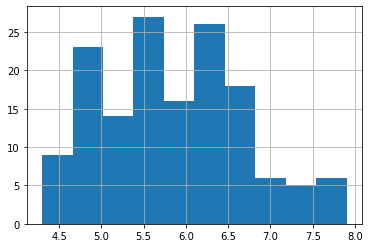

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

X_copy['sepal length (cm)'].hist()

target
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: sepal length (cm), dtype: object

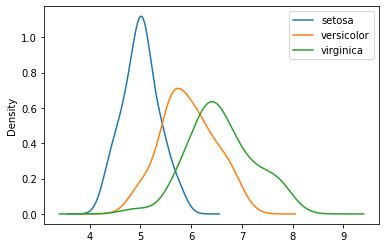

In [15]:
groups['sepal length (cm)'].plot.density(legend=True)

#### Counting values (useful for categorical variables)

In [16]:
X_copy.target.value_counts()

versicolor    50
setosa        50
virginica     50
Name: target, dtype: int64